In [6]:
!pip install rdflib networkx scikit-learn matplotlib
!pip install rdflib
!pip install python-louvain
!pip install pyvis
!pip install pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [48 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-312\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-312\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-312\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-312\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-312\pygraphviz
  creating build\lib.win-amd64-cpython-312\pygraphviz\tests
  copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-312\pygraphviz\tests
  copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-cpython-312\pygraphviz\tests
  copying pygraphviz\tests\test_close.py -> build\lib.win-amd64-cpython-312\pygraphviz\tests
  copying pygraphviz\tests\test_drawing.py -> build\lib.win-amd6

In [25]:
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL
from rdflib import Graph, URIRef, Literal, BNode
from rdflib.namespace import FOAF, RDF

In [27]:
from rdflib import Graph, RDF, URIRef, Namespace

# Load the RDF data
graph = Graph()

graph.parse("teaching_akg.ttl", format="ttl")

# Define namespace and type for entities (adjust as needed)
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Replace with your actual namespace

# Extract and print relevant assertions
relevant_assertions = []

for subj, pred, obj in graph:
    # Exclude subjects and predicates starting with "has" or "is"
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        relevant_assertions.append((subj, pred, obj))

# Print relevant assertions
for subj, pred, obj in relevant_assertions:
    print(f"Subject: {subj.split('#')[-1]}\nPredicate: {pred.split('#')[-1]}\nObject: {obj.split('#')[-1]}\n" )



Subject: http://sonfack.com/2023/12/tao/TutorialRoom
Predicate: subClassOf
Object: http://sonfack.com/2023/12/tao/Building

Subject: http://sonfack.com/2023/12/tao/Desktop
Predicate: label
Object: Desktop

Subject: http://sonfack.com/2023/12/tao/achieves
Predicate: domain
Object: http://sonfack.com/2023/12/cao/Subject

Subject: http://sonfack.com/2023/12/tao/digital-f76fbf2e-b9a1-46ec-b446-b76389636810
Predicate: http://sonfack.com/2023/12/tao/isUsedFor
Object: http://sonfack.com/2023/12/tao/dbcourse-b63a9944-19f6-4f41-bcbd-9333ede86272

Subject: http://sonfack.com/2023/12/tao/setutorial-adbef907-11e0-40c1-8dd2-37eb02899ea9
Predicate: label
Object: Software Engineering Tutorial

Subject: http://sonfack.com/2023/12/tao/achieves
Predicate: range
Object: http://sonfack.com/2023/12/cao/Activity

Subject: http://sonfack.com/2023/12/tao/seproject-d3e90a3c-f550-45eb-b00e-59a3c6120318
Predicate: http://sonfack.com/2023/12/cao/isCarriedOutWith
Object: http://sonfack.com/2023/12/tao/projector-65

In [29]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
import re

akg_file = "teaching_akg.ttl"  # Corrigez l'extension ici

g = Graph()
g.parse(akg_file)
G = nx.DiGraph()
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")


def read_all_activities(akg: Graph, as_str=True) -> list:
    """This function returns all activities of an activity knowledge graph
    - akg: an activity knowledge graph as parsed by RDFLib
    - as_str: (boolean) tells if the activities are simple str default = True
    """
    activities_list = [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities_list


def read_akg_node(node_uri: str, akg:Graph, as_str=True) -> dict:
    """This function returns all elements directly linked to a akg node
    - activity_uri (string): the given activity uri in graph akg
    - akg (Graph): an activity knowledge graph as parsed by RDFLib
    """
    activity_info = {}
    activity_uri_ref = f"{akg_namespace}{node_uri}"
    print(activity_uri_ref)
    for act_predicate, act_object in akg.predicate_objects(subject=URIRef(activity_uri_ref)):
        pred = act_predicate
        obj = act_object
        if as_str:
            pred = str(act_predicate)
            obj = str(act_object)
        if pred in activity_info:
            existing_objects = activity_info[pred] + [obj]
            activity_info[pred] = existing_objects
        else:
            activity_info[pred] = [obj]
    return activity_info


def get_clean_name(uri):
    """Nettoie l'URI pour ne garder que la partie nom sans l'URI et sans l'ID éventuel."""
    return uri.split('/')[-1].split('-')[0]

# print(read_all_activities(g, False))

name = input("Entrez un nom") 

all_activities = read_all_activities(g, False)
all_activities2 = read_all_activities(g, False)
noeud = ""
noeud2 = ""
#print(all_activities)
for activity in all_activities:
    # print(activity.split('/')[-1])
    # subj_label = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
    # print(subj_label)
    
    if (name == activity.split('/')[-1]) :
        nodes = read_akg_node(activity.split('/')[-1], g,False)
        
#print(nodes)
for node in nodes:
    noeud = nodes[node]
    
    #print(noeud[0])
# dbtutorial-78aca3f8-53fd-4f47-9406-414b493efe19
print()
for activity2 in all_activities2:
    if (name == activity2.split('/')[-1]):
        continue
    
    nodes2 = read_akg_node(activity2.split('/')[-1], g,False)
        
    #print(nodes)
    print()
    print(name, activity2.split('/')[-1])
    for node2 in nodes2:
        noeud2 = nodes2[node2]
        for node in nodes:
            noeud = nodes[node]
            if noeud2[0] == noeud[0]:
                print(noeud2[0])


KeyboardInterrupt: Interrupted by user

http://sonfack.com/2023/12/tao/CSC 1002 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/DataBase Course does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course introduces the database concept to level 1 student does not look like a valid URI, trying to serialize this will break.


['http://sonfack.com/2023/12/tao/dbcourse-b63a9944-19f6-4f41-bcbd-9333ede86272', 'http://sonfack.com/2023/12/tao/dbtutorial-78aca3f8-53fd-4f47-9406-414b493efe19', 'http://sonfack.com/2023/12/tao/pycourse-3f993bf5-1c2f-4f58-b85a-7b6b92bcf64b', 'http://sonfack.com/2023/12/tao/pypractical-f18f0361-3f12-4b3d-9459-ce2a019b4668', 'http://sonfack.com/2023/12/tao/uicourse-eaf2d283-4eb8-4024-a2c5-539984984fdd', 'http://sonfack.com/2023/12/tao/pmcourse-adee0f07-9e90-412b-95d4-b45d7a7476bb', 'http://sonfack.com/2023/12/tao/secourse-511f491d-ea2b-428f-900e-604ea778dab5', 'http://sonfack.com/2023/12/tao/setutorial-adbef907-11e0-40c1-8dd2-37eb02899ea9', 'http://sonfack.com/2023/12/tao/sepractical-88ca540f-fd64-4a3c-92fd-590a12f1f46b', 'http://sonfack.com/2023/12/tao/seproject-d3e90a3c-f550-45eb-b00e-59a3c6120318']
http://sonfack.com/2023/12/tao/dbcourse-b63a9944-19f6-4f41-bcbd-9333ede86272
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfac

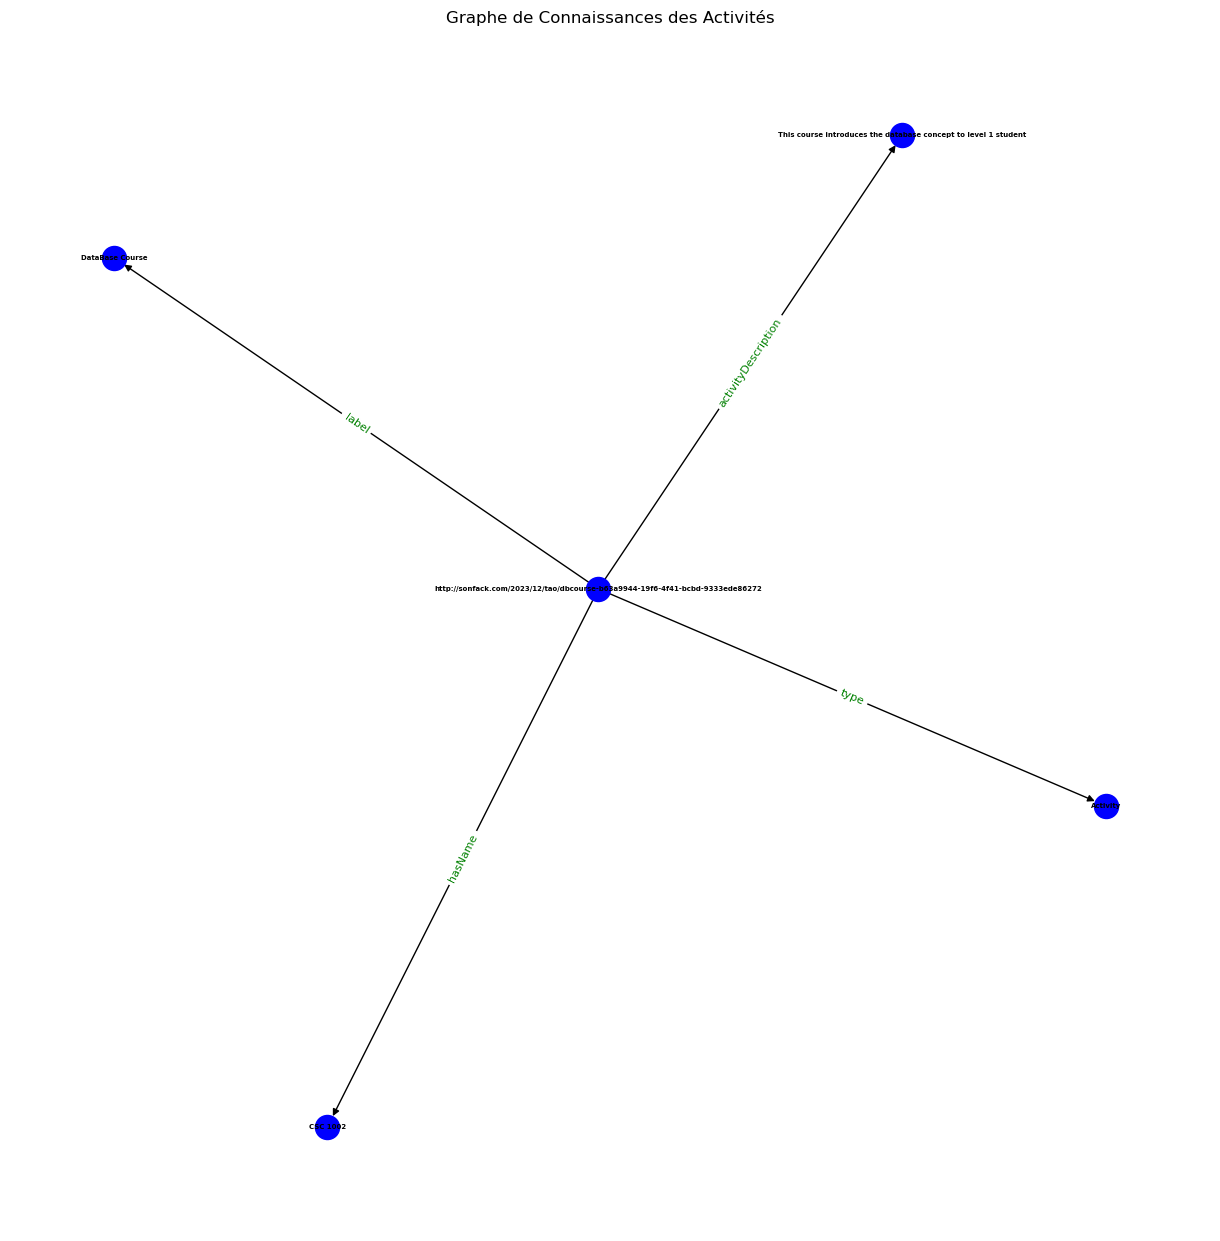

http://sonfack.com/2023/12/tao/CSC 1022 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/DataBase Tutorial does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This tutorial answers database question to level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/dbtutorial-78aca3f8-53fd-4f47-9406-414b493efe19
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1022'], 'http://www.w3.org/2000/01/rdf-schema#label': ['DataBase Tutorial'], 'http://sonfack.com/2023/12/cao/hasBeginTime': ['http://sonfack.com/2023/12/tao/10AM-f5ee7bc0-fb61-4d4e-9a32-565a5a7df03a'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This tutorial answers database question to level 1 student'], 'http://sonfack.com/2023/12/cao/hasDuration': ['120'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-59c2099d-746e-4872-bbc1-ea0891430f47'], 'http://sonfack.com/2023/12/tao/hasLocation': ['http://sonfack.com/2023/12/tao/computerroom-4ecbe47c-8f8e-4835-93ac-16d2392e30a2', 'http://sonfack.com/2023/12/tao/classroom-c1a5b39b-992c-49fb-9c7e-a1ffaa92e884'], 'http://sonfack.com/2023/12/cao/isComposedOf': ['http://so

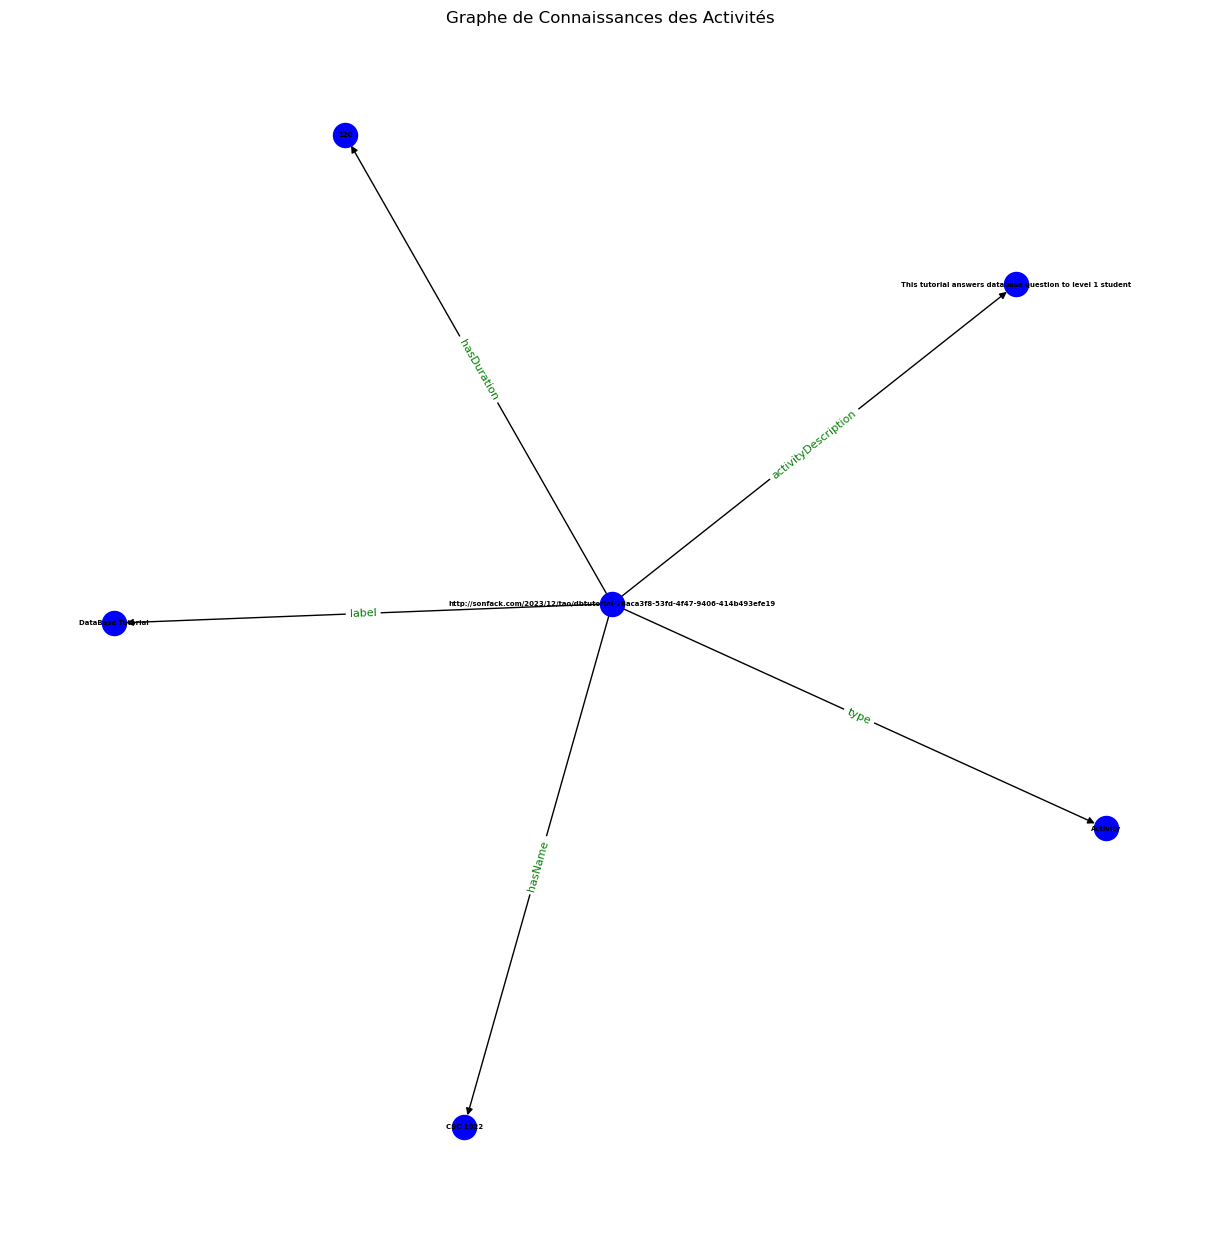

http://sonfack.com/2023/12/tao/CSC 1001 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/Python Course does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course introduces the python programming to level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/pycourse-3f993bf5-1c2f-4f58-b85a-7b6b92bcf64b
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1001'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Python Course'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course introduces the python programming to level 1 student'], 'http://sonfack.com/2023/12/cao/hasTime': ['http://sonfack.com/2023/12/tao/8AM-10AM-0ea7a574-e6be-4dc7-abe1-85a6b8ce2e3d'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-969f073e-1e01-4ad0-a0f0-fb806ba5a50e'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/computerroom-5a2454c8-c664-401c-86b7-425e75dddc39', 'http://sonfack.com/2023/12/tao/tutorialroom-351e99f6-c93b-4377-b987-511652d2eefe'], 'http://sonfack.com/2023/12/tao/isFollowedBy': ['http://sonfack.com/2023/12/tao/pypractical-f18f0361-3f12-4b3d-

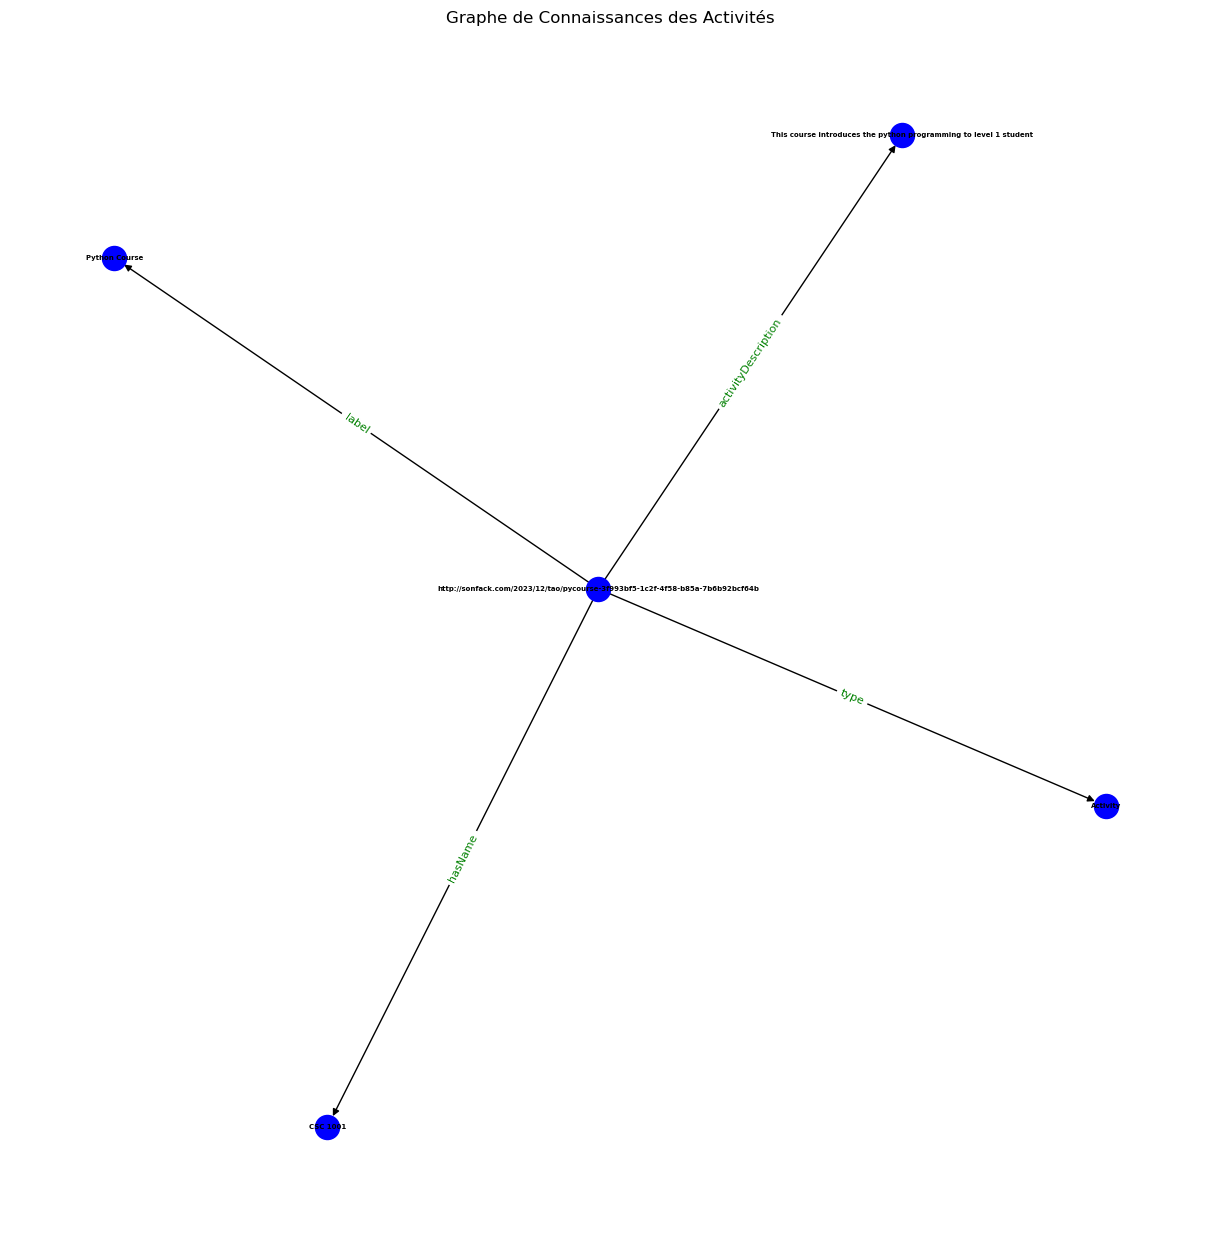

http://sonfack.com/2023/12/tao/CSC 1011 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/Python Practical does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course is for monitoring python programming practicals for level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/pypractical-f18f0361-3f12-4b3d-9459-ce2a019b4668
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1011'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Python Practical'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course is for monitoring python programming practicals for level 1 student'], 'http://sonfack.com/2023/12/cao/hasRule': ['http://sonfack.com/2023/12/tao/rule-cdc19603-45e5-4c06-8d5a-47624147f67e'], 'http://sonfack.com/2023/12/cao/hasTime': ['http://sonfack.com/2023/12/tao/8AM-10AM-1470781d-1128-4f43-ab61-4088953f071a'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-969f073e-1e01-4ad0-a0f0-fb806ba5a50e'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/computerroom-5a2454c8-c664-401c-86b7-425e75dddc39', 'http://sonfack.com/2023/12/tao/tutorialroom-351e99f6-c

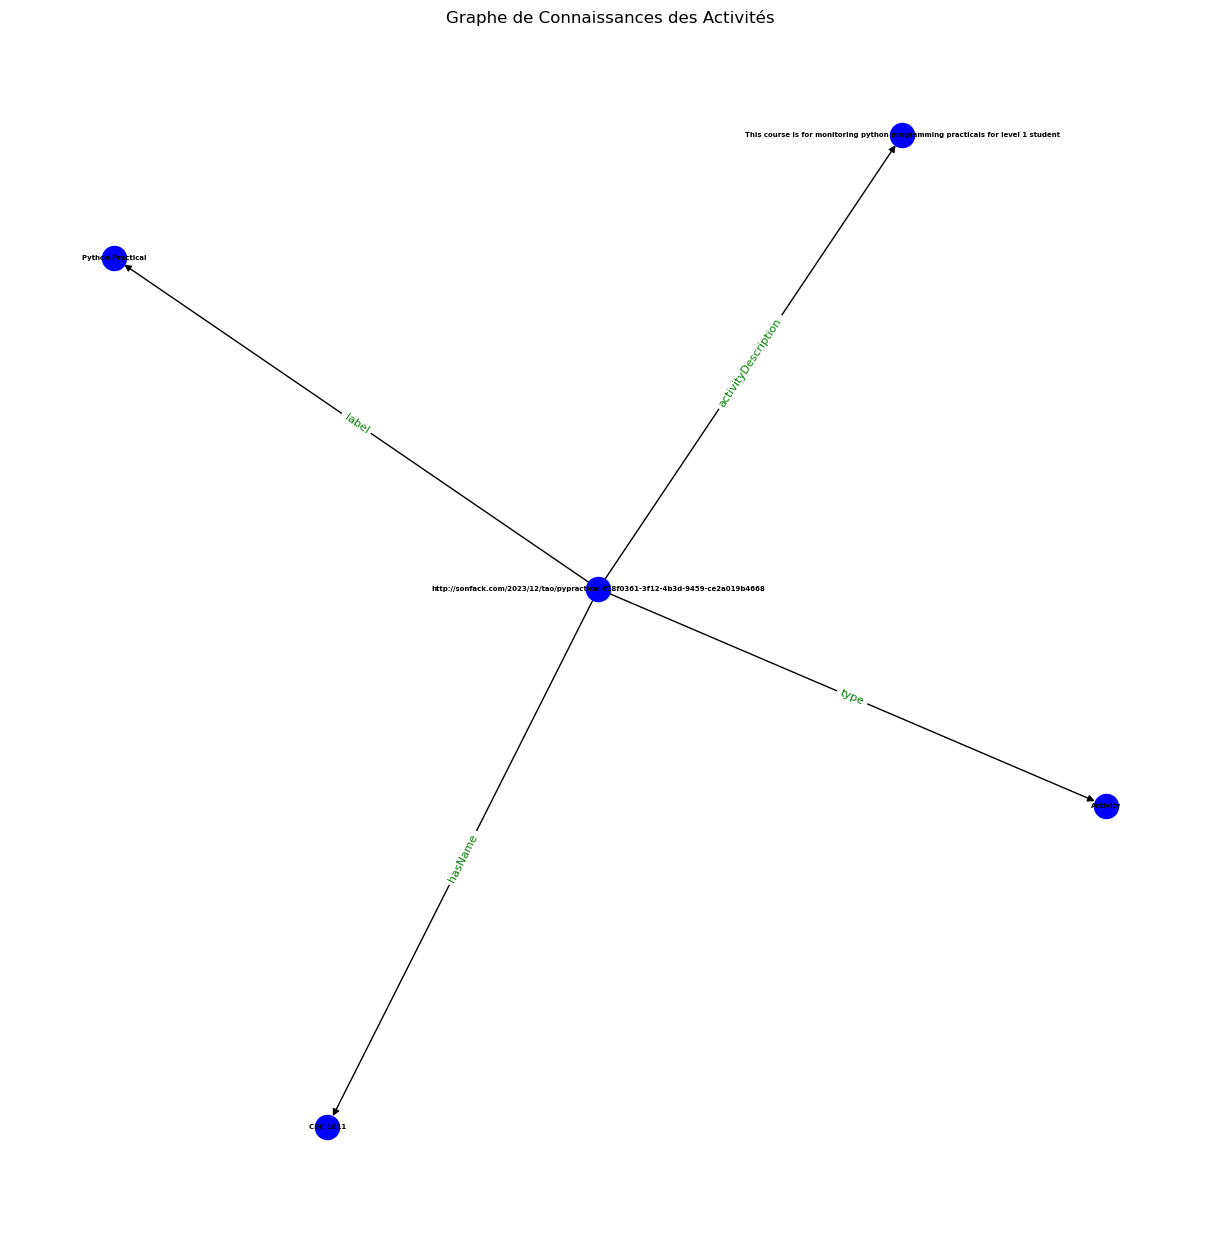

http://sonfack.com/2023/12/tao/CSC 1006 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/User Interface Course does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course introduces the user interface design principles to level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/uicourse-eaf2d283-4eb8-4024-a2c5-539984984fdd
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1006'], 'http://www.w3.org/2000/01/rdf-schema#label': ['User Interface Course'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course introduces the user interface design principles to level 1 student'], 'http://sonfack.com/2023/12/cao/hasTime': ['http://sonfack.com/2023/12/tao/10AM-12AM-6ab82d7d-72dc-40f2-a209-8bc6b4bb04e7'], 'http://sonfack.com/2023/12/cao/hasObjectiveive': ['http://sonfack.com/2023/12/tao/objective-9a59e20a-60f0-4798-8895-50f6b79621c5'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/computerroom-9cd6c49c-e52f-48ef-9d23-d868af4802c4', 'http://sonfack.com/2023/12/tao/classroom-9b1749fc-8ce7-42ce-89d6-4e7ff8b826c7'], 'http://sonfack.com/2023/12/cao/isComposedOf': ['http://sonfack.com/2023/12/tao/lecturin

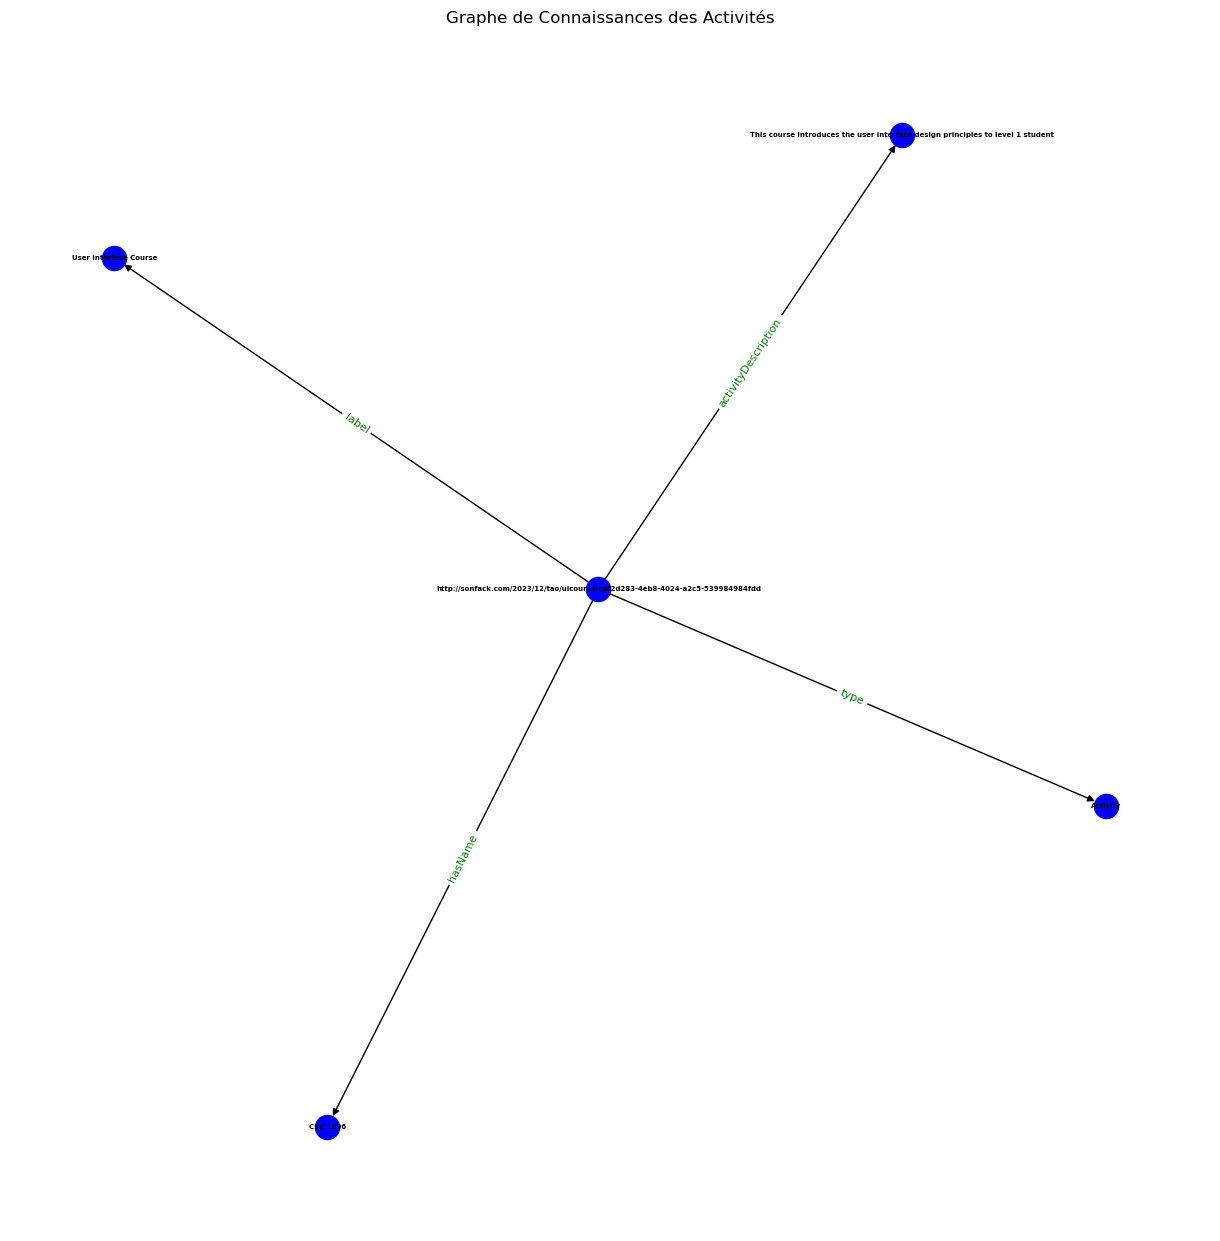

http://sonfack.com/2023/12/tao/PM 1001 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/Project Management Course does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course introduces project management concepts to level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/pmcourse-adee0f07-9e90-412b-95d4-b45d7a7476bb
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['PM 1001'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Project Management Course'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course introduces project management concepts to level 1 student'], 'http://sonfack.com/2023/12/cao/hasTime': ['http://sonfack.com/2023/12/tao/8AM-10AM-b139b467-7fbf-4298-9338-fa372b608e5e'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-0b6e8fa9-d03d-4636-ab9c-b34578b4ea45'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/classroom-3414ff41-3e7a-44de-a679-baac1ab873c2'], 'http://sonfack.com/2023/12/cao/isComposedOf': ['http://sonfack.com/2023/12/tao/lecturing-12b5c207-f470-4bf3-bb3d-e6b31c954954'], 'http://sonfack.com/2023/12/cao/isCarriedOutWith': [

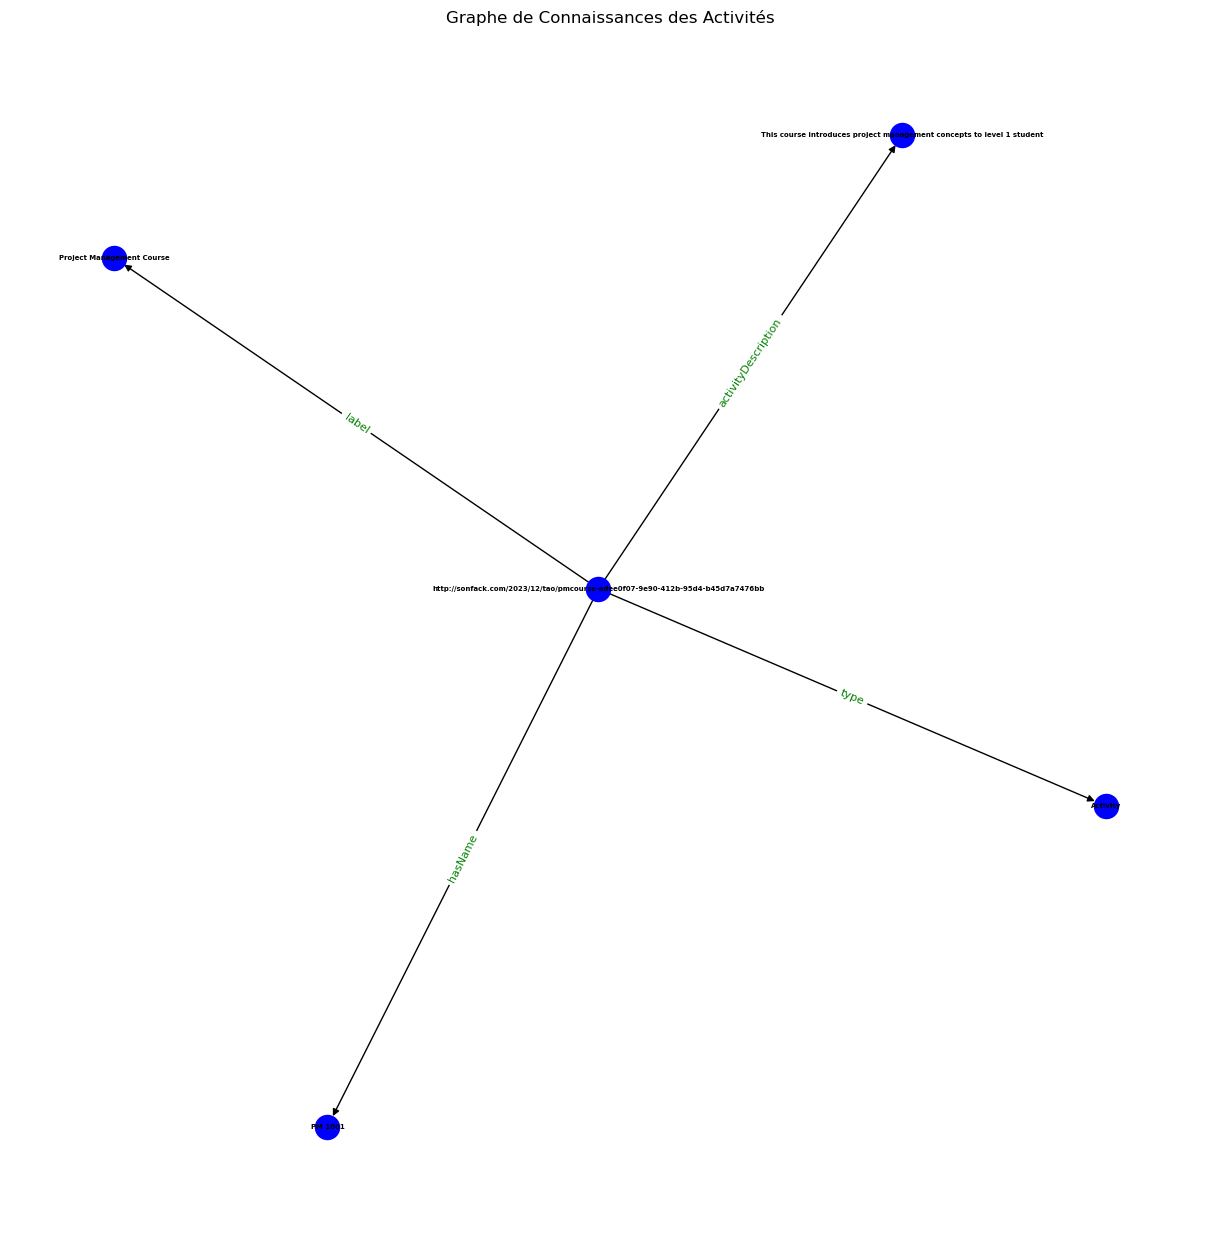

http://sonfack.com/2023/12/tao/CSC 1003 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/Software Engineering Course does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course introduces software engineering to level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/secourse-511f491d-ea2b-428f-900e-604ea778dab5
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1003'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Software Engineering Course'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course introduces software engineering to level 1 student'], 'http://sonfack.com/2023/12/cao/hasDuration': ['120'], 'http://sonfack.com/2023/12/cao/hasEndTime': ['http://sonfack.com/2023/12/tao/12AM-6ec5a9a1-54b9-4310-96f4-9ecbdbf8344f'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-f4de69e1-e2ba-41a6-a268-803293e73080'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/classroom-25eafa60-5f87-4e1f-9609-93bcdcfbb0c9'], 'http://sonfack.com/2023/12/tao/isFollowedBy': ['http://sonfack.com/2023/12/tao/setutorial-adbef907-11e0-40c1-8dd2-37eb02899ea9'], '

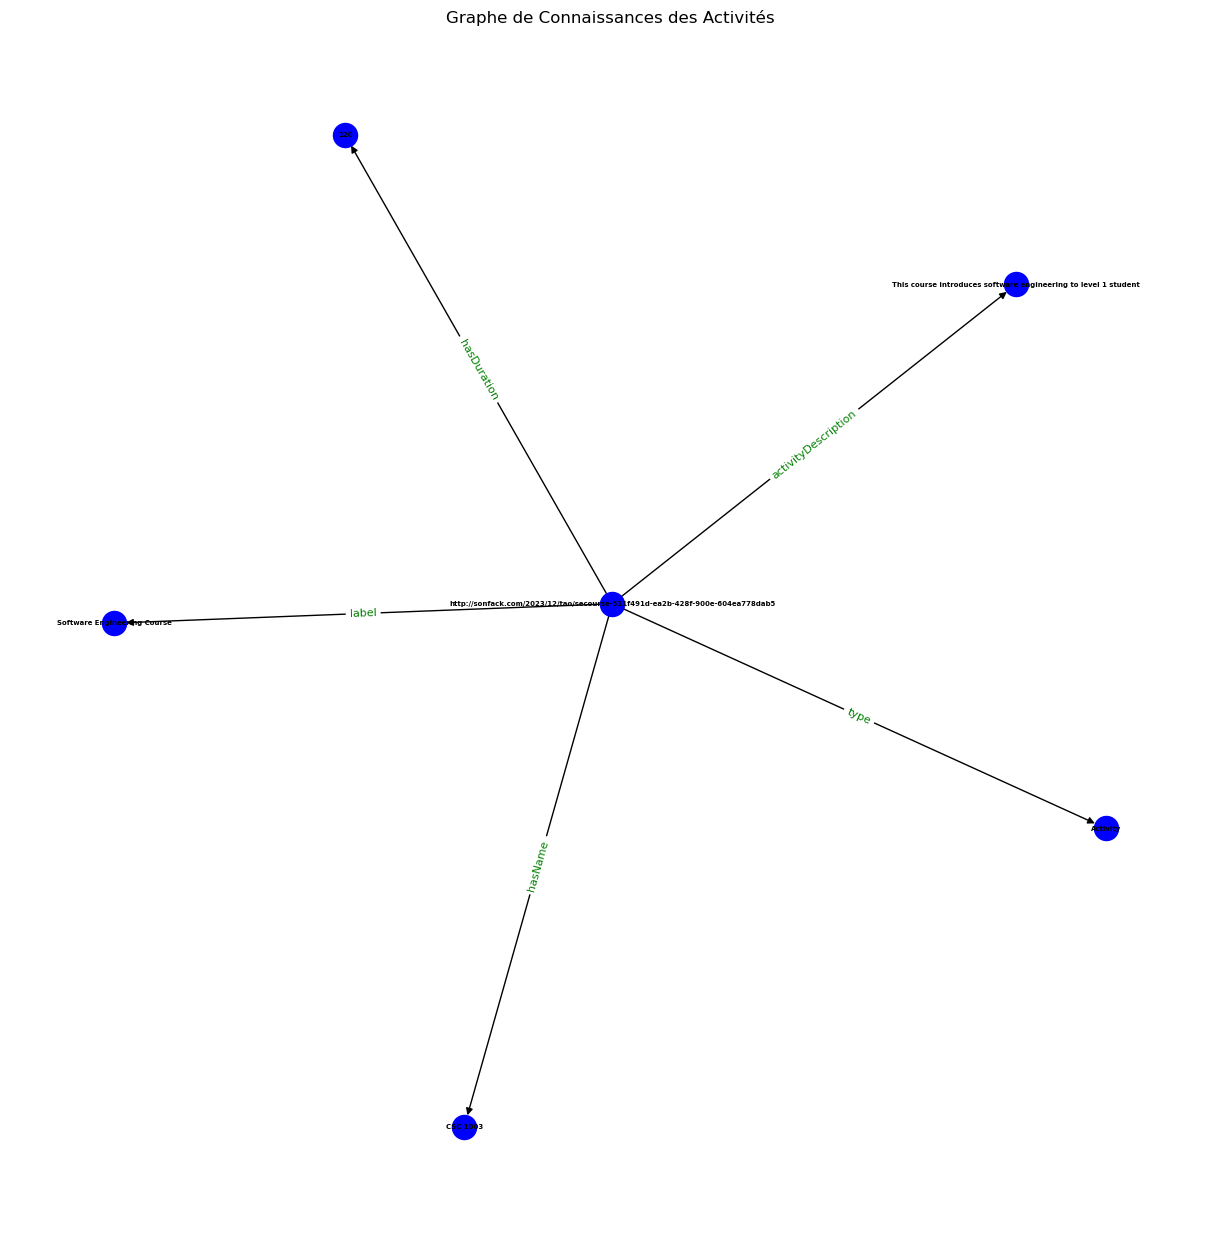

http://sonfack.com/2023/12/tao/CSC 1023 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/Software Engineering Tutorial does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This tutorial answers level 1 student questions on software engineering does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/setutorial-adbef907-11e0-40c1-8dd2-37eb02899ea9
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1023'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Software Engineering Tutorial'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This tutorial answers level 1 student questions on software engineering'], 'http://sonfack.com/2023/12/cao/hasBeginTime': ['http://sonfack.com/2023/12/tao/10AM-0fbdca75-5c06-4a88-9181-ee1a035a7fec'], 'http://sonfack.com/2023/12/cao/hasDuration': ['120'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-f4de69e1-e2ba-41a6-a268-803293e73080'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/tutorialroom-351e99f6-c93b-4377-b987-511652d2eefe'], 'http://sonfack.com/2023/12/tao/isFollowedBy': ['http://sonfack.com/2023/12/tao/sepractical-88ca540f-fd64-4a3c-92f

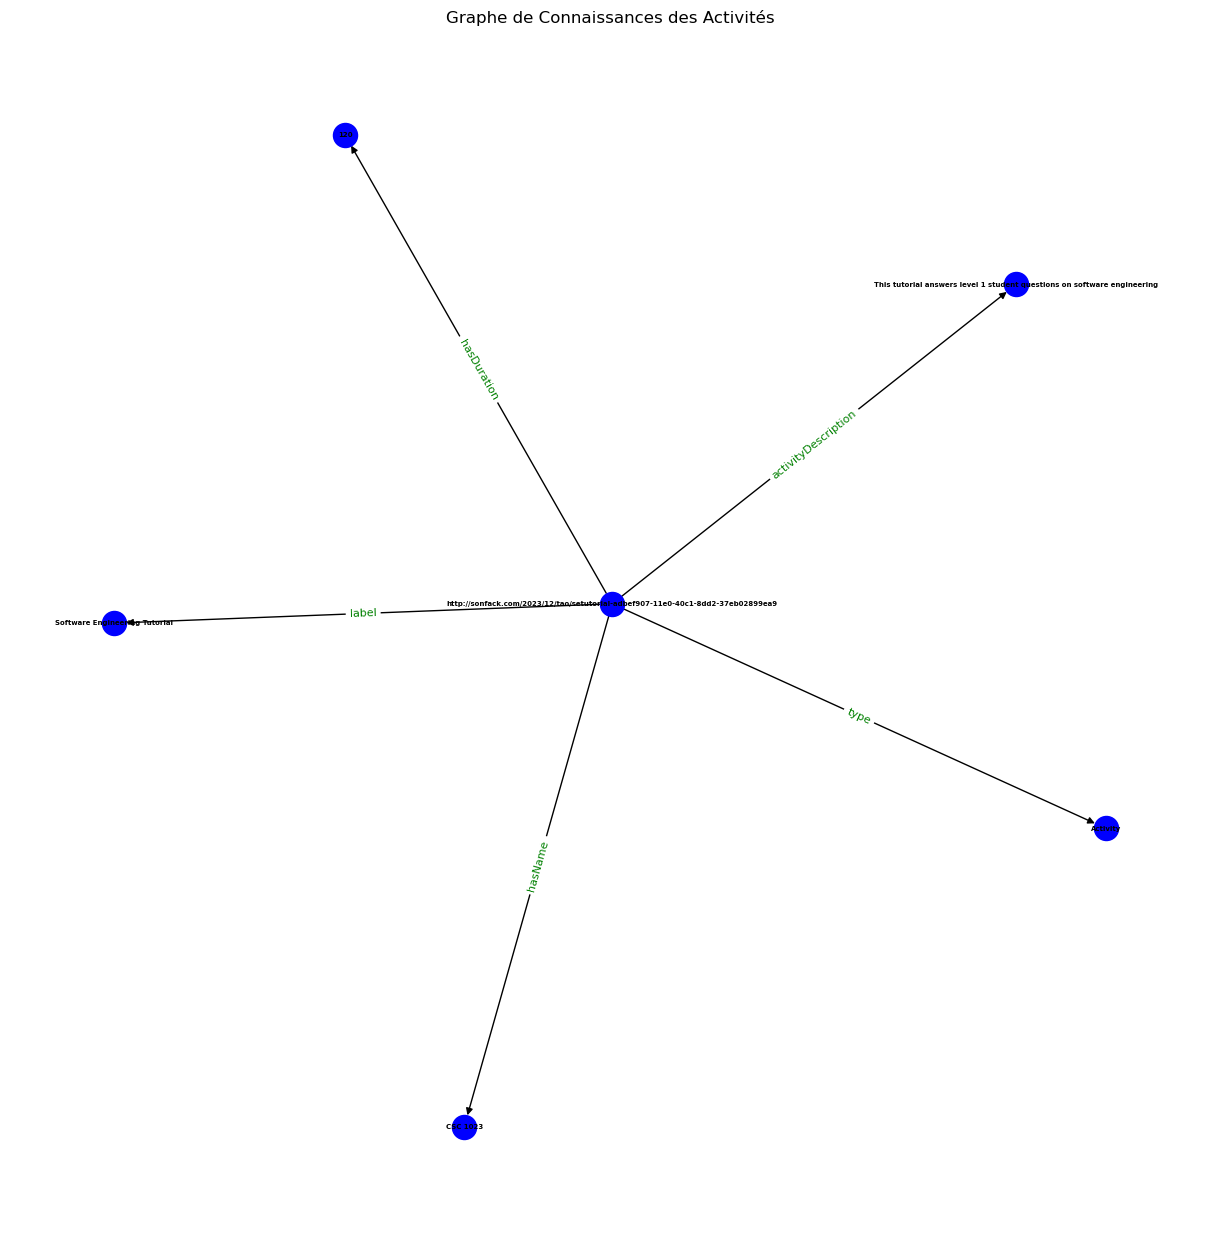

http://sonfack.com/2023/12/tao/CSC 1013 does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/Software Engineering Practical does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course monitor software engineering practical questions for level 1 student does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/sepractical-88ca540f-fd64-4a3c-92fd-590a12f1f46b
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1013'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Software Engineering Practical'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course monitor software engineering practical questions for level 1 student'], 'http://sonfack.com/2023/12/cao/hasRule': ['http://sonfack.com/2023/12/tao/rule-cdc19603-45e5-4c06-8d5a-47624147f67e'], 'http://sonfack.com/2023/12/cao/hasTime': ['http://sonfack.com/2023/12/tao/10AM-12AM-f4e589a5-aac9-42b7-b498-706732141ca1'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-f4de69e1-e2ba-41a6-a268-803293e73080'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/computerroom-5a2454c8-c664-401c-86b7-425e75dddc39'], 'http://sonfack.com/2023/12/tao/isFoll

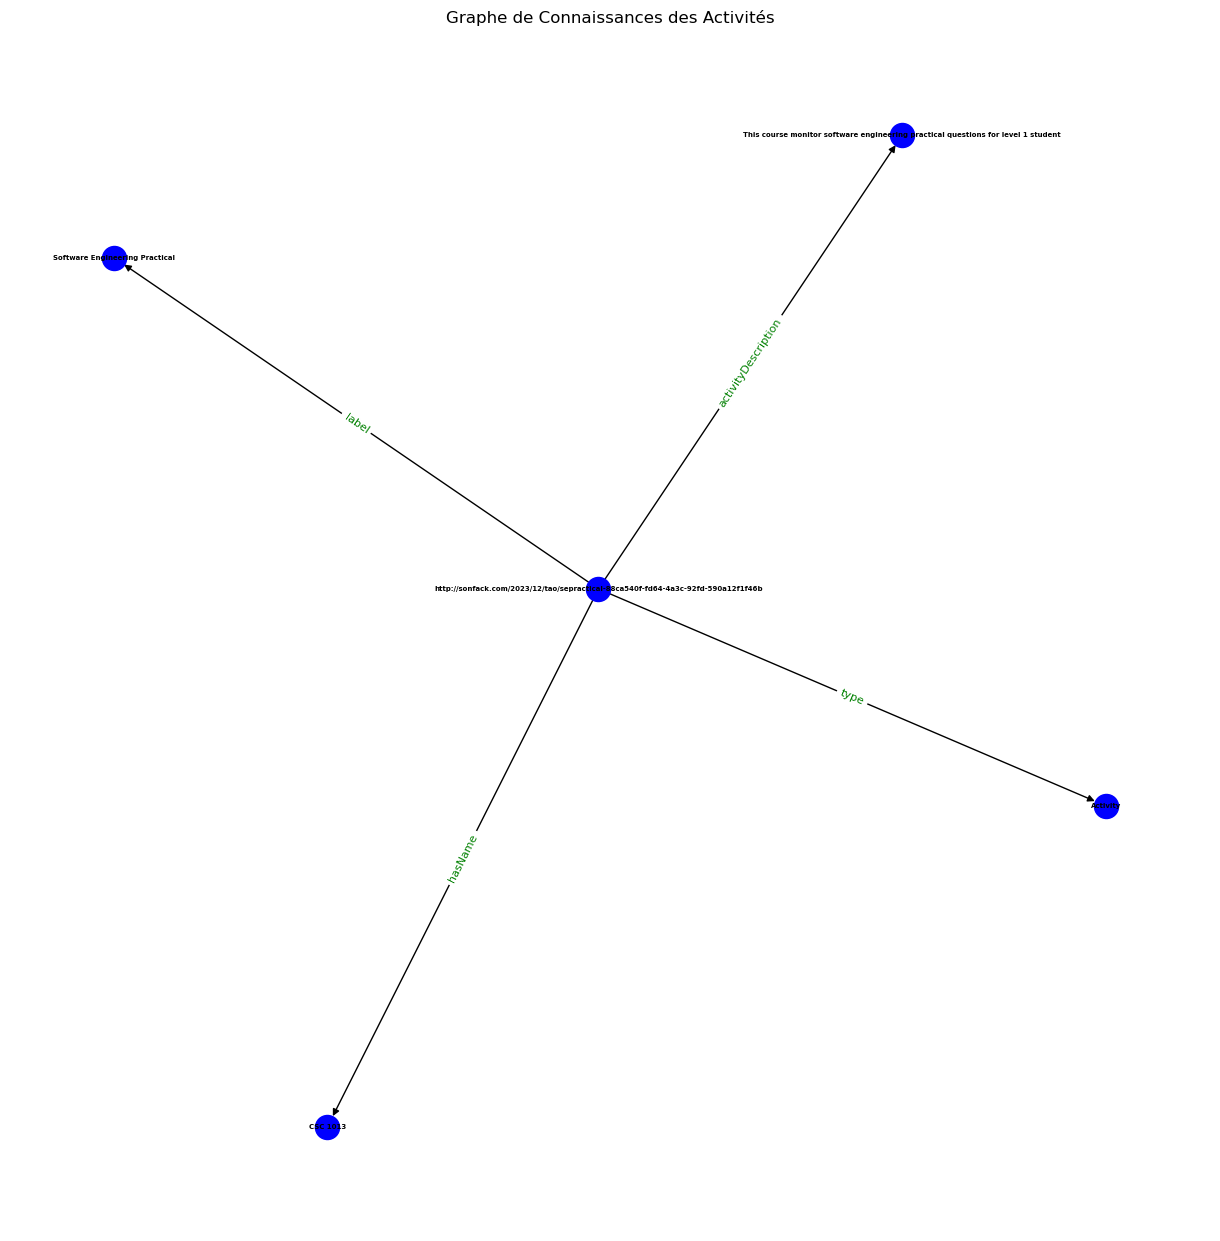

http://sonfack.com/2023/12/tao/Software Engineering Project does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/This course is for follow up of software engineering projects of level 1 student does not look like a valid URI, trying to serialize this will break.
http://sonfack.com/2023/12/tao/CSC 1005 does not look like a valid URI, trying to serialize this will break.


http://sonfack.com/2023/12/tao/seproject-d3e90a3c-f550-45eb-b00e-59a3c6120318
{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': ['http://sonfack.com/2023/12/cao/Activity'], 'http://www.w3.org/2000/01/rdf-schema#label': ['Software Engineering Project'], 'http://sonfack.com/2023/12/cao/activityDescription': ['This course is for follow up of software engineering projects of level 1 student'], 'http://sonfack.com/2023/12/cao/hasName': ['CSC 1005'], 'http://sonfack.com/2023/12/cao/hasTime': ['http://sonfack.com/2023/12/tao/08AM-10AM-35e7d9ed-4694-48e0-a6b6-394bd4155a13'], 'http://sonfack.com/2023/12/cao/hasObjective': ['http://sonfack.com/2023/12/tao/objective-284ef78c-99f5-45f0-935a-553678664616'], 'http://sonfack.com/2023/12/cao/hasLocation': ['http://sonfack.com/2023/12/tao/computerroom-5a2454c8-c664-401c-86b7-425e75dddc39'], 'http://sonfack.com/2023/12/cao/isBeneficialTo': ['http://sonfack.com/2023/12/tao/bsc-410688e8-e5d3-4e9c-9ca4-c28bf92827af'], 'http://sonfack.com/2023/12/cao/isCa

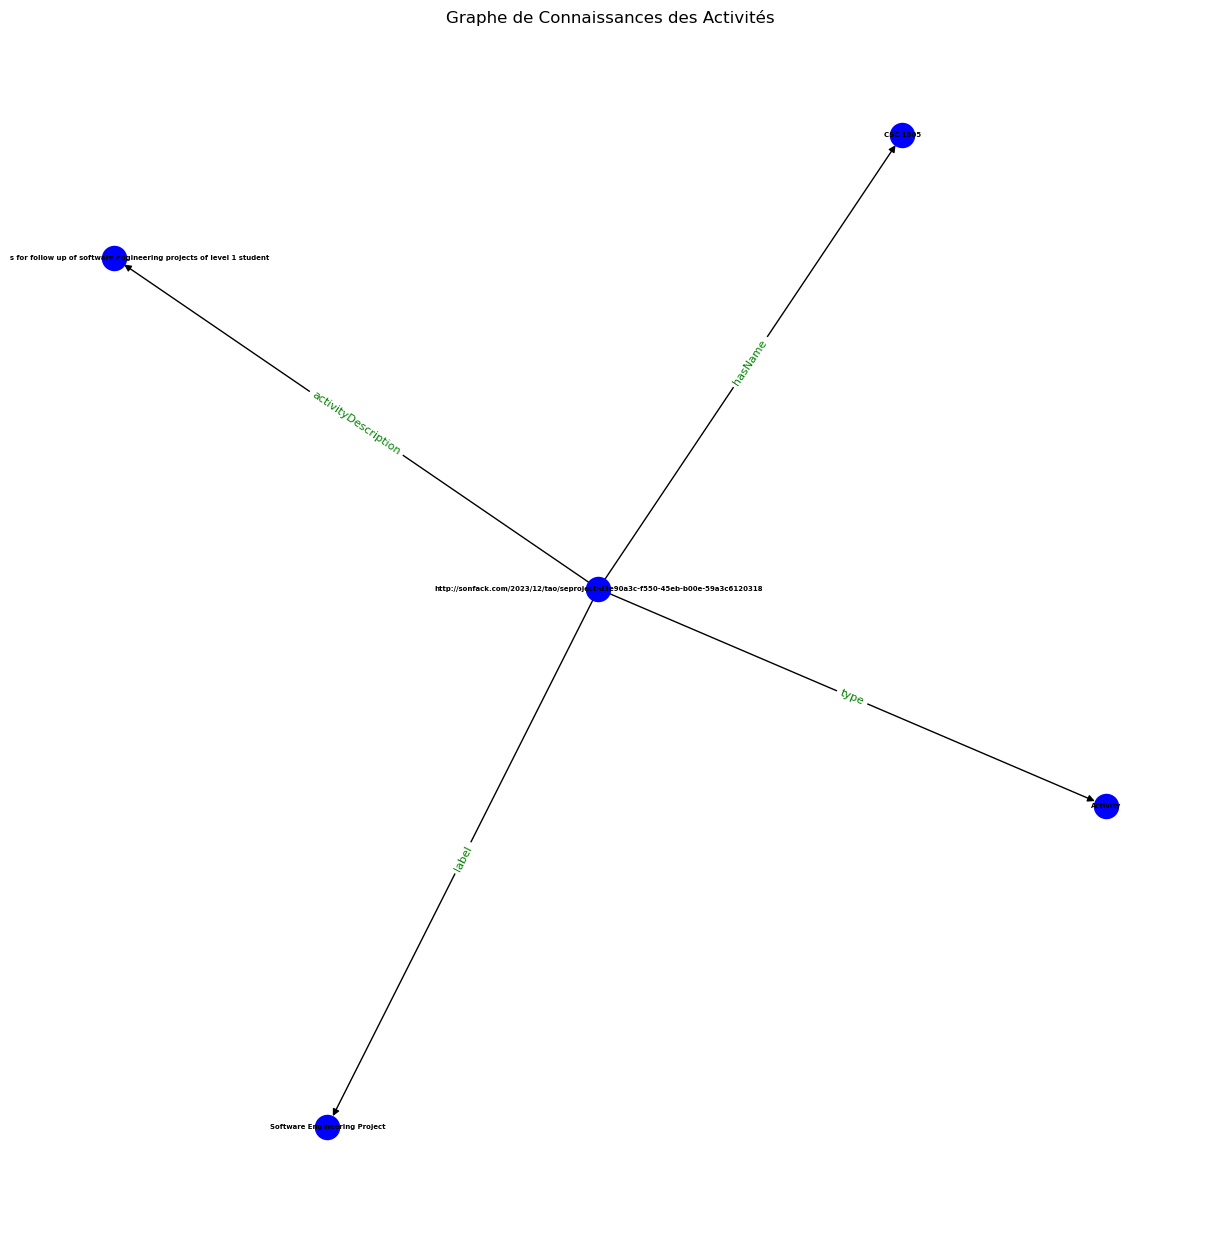

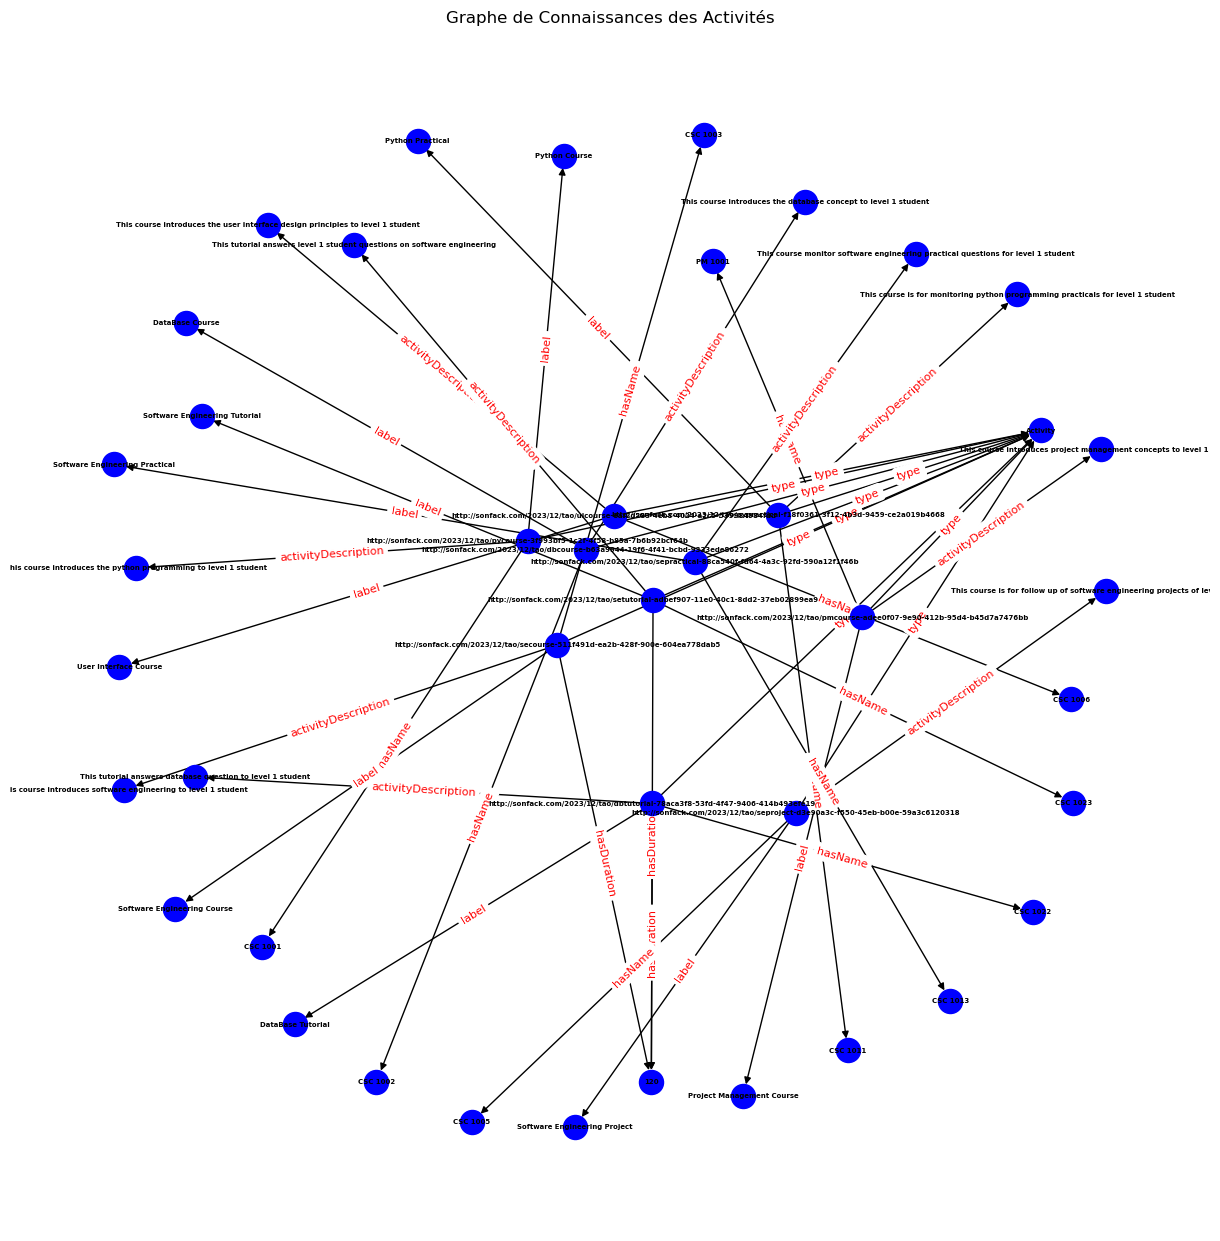

In [548]:
def add_activity_to_nxgraph(G, activity_uri, activity_info):
    #print("ajout de l'activité", activity_uri)
    #print("affichage des informations", activity_info)
    activity_g = nx.DiGraph()

    for pred, obj_list in activity_info.items():
        pred_label = pred.split('/')[-1]
        if '#' in pred_label:
            pred_label = pred_label.split('#')[1]

        for obj in obj_list:
            obj_label = obj.split('/')[-1]
            node_info = read_akg_node(obj_label, g)

            if node_info:
                # Assurez-vous que vous récupérez une chaîne et non une liste
                obj_label = node_info.get('http://sonfack.com/2023/12/tao/hasName', [None])[0]
                if obj_label is None:
                    continue  # Passer à l'itération suivante si obj_label est None


            G.add_node(activity_uri)
            G.add_node(obj_label)
            G.add_edge(activity_uri, obj_label, label=pred_label)
            activity_g.add_node(activity_uri)
            activity_g.add_node(obj_label)
            activity_g.add_edge(activity_uri, obj_label, label=pred_label)

    visualize_activity(activity_g)


def visualize_activity(G):
  # Visualize the graph
  plt.figure(figsize=(12, 12))

  # Generate positions for nodes using a layout algorithm
  pos = nx.spring_layout(G, seed=42)

  # Draw the nodes and edges
  nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

  # Draw edge labels
  edge_labels = nx.get_edge_attributes(G, 'label')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

  # Show plot
  plt.title("Graphe de Connaissances des Activités")
  plt.show()


liste_activity = read_all_activities(g, as_str=True)
print(liste_activity)
for activity in liste_activity:
  subj = activity.split('/')[-1]
  info_activity = read_akg_node(subj, g, as_str=True)
  print(info_activity)
  add_activity_to_nxgraph(G,activity,info_activity)


# Visualize the graph
plt.figure(figsize=(12, 12))

# Generate positions for nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Show plot
plt.title("Graphe de Connaissances des Activités")
plt.show()



In [550]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
import re

akg_file = "teaching_akg.ttl"  # Corrigez l'extension ici

g = Graph()
g.parse(akg_file)
G = nx.DiGraph()
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")


def read_all_activities(akg: Graph, as_str=True) -> list:
    """This function returns all activities of an activity knowledge graph
    - akg: an activity knowledge graph as parsed by RDFLib
    - as_str: (boolean) tells if the activities are simple str default = True
    """
    activities_list = [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities_list


def read_akg_node(node_uri: str, akg:Graph, as_str=True) -> dict:
    """This function returns all elements directly linked to a akg node
    - activity_uri (string): the given activity uri in graph akg
    - akg (Graph): an activity knowledge graph as parsed by RDFLib
    """
    activity_info = {}
    activity_uri_ref = f"{akg_namespace}{node_uri}"
    print(activity_uri_ref)
    for act_predicate, act_object in akg.predicate_objects(subject=URIRef(activity_uri_ref)):
        pred = act_predicate
        obj = act_object
        if as_str:
            pred = str(act_predicate)
            obj = str(act_object)
        if pred in activity_info:
            existing_objects = activity_info[pred] + [obj]
            activity_info[pred] = existing_objects
        else:
            activity_info[pred] = [obj]
    return activity_info


def get_clean_name(uri):
    """Nettoie l'URI pour ne garder que la partie nom sans l'URI et sans l'ID éventuel."""
    return uri.split('/')[-1].split('-')[0]

# print(read_all_activities(g, False))

name = input("Entrez un nom") 

all_activities = read_all_activities(g, False)
all_activities2 = read_all_activities(g, False)
noeud = ""
noeud2 = ""
#print(all_activities)
for activity in all_activities:
    # print(activity.split('/')[-1])
    # subj_label = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
    # print(subj_label)
    
    if (name == activity.split('/')[-1]) :
        nodes = read_akg_node(activity.split('/')[-1], g,False)
        
#print(nodes)
for node in nodes:
    noeud = nodes[node]
    
    #print(noeud[0])
# dbtutorial-78aca3f8-53fd-4f47-9406-414b493efe19
print()
for activity2 in all_activities2:
    if (name == activity2.split('/')[-1]):
        continue
    
    nodes2 = read_akg_node(activity2.split('/')[-1], g,False)
        
    #print(nodes)
    print()
    print(name, activity2.split('/')[-1])
    for node2 in nodes2:
        noeud2 = nodes2[node2]
        for node in nodes:
            noeud = nodes[node]
            if noeud2[0] == noeud[0]:
                print(noeud2[0])








Entrez un nom dbcourse



http://sonfack.com/2023/12/tao/dbcourse-b63a9944-19f6-4f41-bcbd-9333ede86272

dbcourse dbcourse-b63a9944-19f6-4f41-bcbd-9333ede86272
http://sonfack.com/2023/12/cao/Activity
CSC 1002
DataBase Course
This course introduces the database concept to level 1 student
http://sonfack.com/2023/12/tao/8AM-10AM-1470781d-1128-4f43-ab61-4088953f071a
http://sonfack.com/2023/12/tao/objective-ddd7e420-9347-4a53-8f06-d30d3efd8398
http://sonfack.com/2023/12/tao/classroom-b2c326d0-8551-41c4-aee5-11365e117523
http://sonfack.com/2023/12/tao/dbtutorial-78aca3f8-53fd-4f47-9406-414b493efe19
http://sonfack.com/2023/12/tao/lecturing-9246b9e2-d557-4869-885a-c541257280eb
http://sonfack.com/2023/12/tao/bsc-09c739e7-2a77-4b4c-9197-cdba96c340dd
http://sonfack.com/2023/12/tao/book-b4d784d0-8be6-473f-a4cc-3c5ff8a80b6d
http://sonfack.com/2023/12/tao/teacher-09c4175e-f119-4d66-ac53-920a5c9dc796
http://sonfack.com/2023/12/tao/dbtutorial-78aca3f8-53fd-4f47-9406-414b493efe19

dbcourse dbtutorial-78aca3f8-53fd-4f47-9406-414

In [554]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
import networkx.algorithms.community as nx_comm
from pyvis.network import Network

# Définir le chemin d'accès au fichier TTL
teaching_akg_path = 'teaching_akg.ttl'

# Charger le fichier TTL dans un graphe RDFLib
teaching_akg_graph = rdflib.Graph()
teaching_akg_graph.parse(teaching_akg_path, format='ttl')

# Convertir le graphe RDFLib en un graphe NetworkX
G_teaching = rdflib_to_networkx_graph(teaching_akg_graph)

# Appliquer l'algorithme de Louvain pour détecter les communautés
partition_teaching = nx_comm.louvain_communities(G_teaching, seed=42)

# Afficher les communautés filtrées
for i, community in enumerate(partition_teaching, start=1):
    # Filtrer pour ne conserver que les littéraux
    filtered_community = [member for member in community if isinstance(member, rdflib.term.Literal)]
    print(f'Communauté {i} (sans URIs): {filtered_community}')

# Initialiser PyVis Network
net = Network(notebook=True)
# Ajouter des nœuds et des arêtes
for node in G_teaching.nodes:
    net.add_node(node, label=str(node), title=str(node))
for edge in G_teaching.edges:
    net.add_edge(edge[0], edge[1])

# Enregistrer et afficher le graphe
net.show('teaching_akg_graph.html')



Communauté 1 (sans URIs): [rdflib.term.Literal('CR002'), rdflib.term.Literal('Begining database with MySQL'), rdflib.term.Literal('CR001'), rdflib.term.Literal('Introduction to MYSQL'), rdflib.term.Literal('This tutorial answers database question to level 1 student'), rdflib.term.Literal('MySQL 8.0'), rdflib.term.Literal('Bsc 2 students'), rdflib.term.Literal('Microsoft excel course'), rdflib.term.Literal('CSC 1022'), rdflib.term.Literal('A geographical located classroom', lang='en'), rdflib.term.Literal('Classroom Location'), rdflib.term.Literal('CR004'), rdflib.term.Literal('DataBase Tutorial'), rdflib.term.Literal('DataBase Course'), rdflib.term.Literal('This course introduces the database concept to level 1 student'), rdflib.term.Literal('Bsc year 2'), rdflib.term.Literal('CSC 1002'), rdflib.term.Literal('CR003')]
Communauté 2 (sans URIs): [rdflib.term.Literal('Teaching role ', lang='en'), rdflib.term.Literal('Human subject'), rdflib.term.Literal('DB tutorial teacher'), rdflib.term

In [556]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, URIRef, Namespace
import re

# Charger le graphe RDF
g = Graph()
g.parse("teaching_akg.ttl")  # Assurez-vous que le chemin d'accès est correct

# Définition des namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonctions auxiliaires
def read_all_activities(akg: Graph, as_str=True) -> list:
    """Récupère toutes les activités du graphe RDF."""
    return [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

def read_akg_node(node_uri: str, akg: Graph, as_str=True) -> dict:
    """Extrait toutes les informations liées à un noeud spécifique dans le graphe RDF."""
    activity_info = {}
    for pred, obj in akg.predicate_objects(subject=URIRef(f"{akg_namespace}{node_uri}")):
        key = str(pred) if as_str else pred
        value = str(obj) if as_str else obj
        activity_info.setdefault(key, []).append(value)
    return activity_info

def get_clean_name(uri: str) -> str:
    """Nettoie l'URI pour obtenir un nom simplifié."""
    return uri.split('/')[-1].split('-')[0]

def visualize_communities_separately(G, partition):
    """Visualise chaque communauté séparément."""
    for community_id, nodes in partition.items():
        H = G.subgraph(nodes)
        pos = nx.spring_layout(H, seed=42)
        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(H, pos, node_color=f"C{community_id % 10}", node_size=300)
        nx.draw_networkx_edges(H, pos, edge_color="gray", alpha=0.5)
        nx.draw_networkx_labels(H, pos, font_size=8, font_weight='bold', font_color='black')
        plt.title(f"Communauté {community_id}")
        plt.show()

# Interaction utilisateur pour entrer un nom d'activité
name = input("Entrez un nom: ") 

# Préparation du graphe
G = nx.DiGraph()
all_activities = read_all_activities(g)
activities_info = {activity.split('/')[-1]: read_akg_node(activity.split('/')[-1], g) for activity in all_activities}




Entrez un nom:  dbcourse


In [31]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
import re

# Load the RDF file
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.DiGraph()

# Define namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Function to extract and clean URI names
def extract_name(uri, namespace):
    """Extracts the proper name of a URI by removing identifiers and prefixes."""
    name = uri.replace(namespace, "")
    name = re.sub(r'-\w+$', '', name)  # Remove identifiers after a dash
    return name

# Function to read all activities
def read_all_activities(akg: Graph) -> list:
    """Returns all activities in a knowledge graph."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Function to get details of a specific activity
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Returns details of an activity in dictionary form."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        pred_label = extract_name(str(pred), str(akg_namespace))
        obj_label = extract_name(str(obj), str(akg_namespace))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Function to add activities and their relationships to the NetworkX graph
def add_activity_to_graph(G, activity_uri, akg):
    """Adds activities and their relationships to a NetworkX graph."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri), str(akg_namespace))
    
    for pred, objs in details.items():
        for obj in objs:
            G.add_node(activity_name, type="activity")
            G.add_node(obj, type="resource")
            G.add_edge(activity_name, obj, label=pred)

# Function to visualize the knowledge graph with two activities
def visualize_dual_activity_graph(G, activity_name1, activity_name2):
    """Visualizes the graph for two selected activities."""
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(14, 12))

    # Color nodes and adjust sizes
    node_colors = ["orange" if G.nodes[node].get("type") == "activity" else "skyblue" for node in G]
    node_sizes = [1000 if G.nodes[node].get("type") == "activity" else 500 for node in G]

    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=10, edge_color="gray")
    
    # Show edge labels without full URIs
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title(f"Graphe de connaissance pour les activités '{activity_name1}' et '{activity_name2}'")
    plt.show()

# Main function
def main():
    # List available activities
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity), str(akg_namespace))}")

    # Select the first activity
    while True:
        try:
            choice1 = int(input("Choisissez la première activité par numéro : ")) - 1
            if 0 <= choice1 < len(all_activities):
                break
            else:
                print("Numéro invalide. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer un nombre.")
    
    # Select the second activity
    while True:
        try:
            choice2 = int(input("Choisissez la deuxième activité par numéro : ")) - 1
            if 0 <= choice2 < len(all_activities) and choice2 != choice1:
                break
            else:
                print("Numéro invalide ou même activité choisie. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer un nombre.")

    # Get selected activities
    selected_activity1 = all_activities[choice1]
    selected_activity2 = all_activities[choice2]

    # Add both activities and their relationships to the NetworkX graph
    add_activity_to_graph(G, selected_activity1, g)
    add_activity_to_graph(G, selected_activity2, g)
    
    # Extract names of activities for visualization
    activity_name1 = extract_name(str(selected_activity1), str(akg_namespace))
    activity_name2 = extract_name(str(selected_activity2), str(akg_namespace))
    
    # Visualize the knowledge graph centered on both activities
    visualize_dual_activity_graph(G, activity_name1, activity_name2)

    # Explanatory text
    print(f"\nGraphe de connaissance d'activité pour '{activity_name1}' et '{activity_name2}':")
    print("Les nœuds représentent les activités et les ressources associées.")
    print("Les arêtes indiquent les types de relations entre les activités et les ressources.")

if __name__ == "__main__":
    main()


Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


KeyboardInterrupt: Interrupted by user

Available Activities:
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choose the first activity by number:  10
Choose the second activity by number:  3


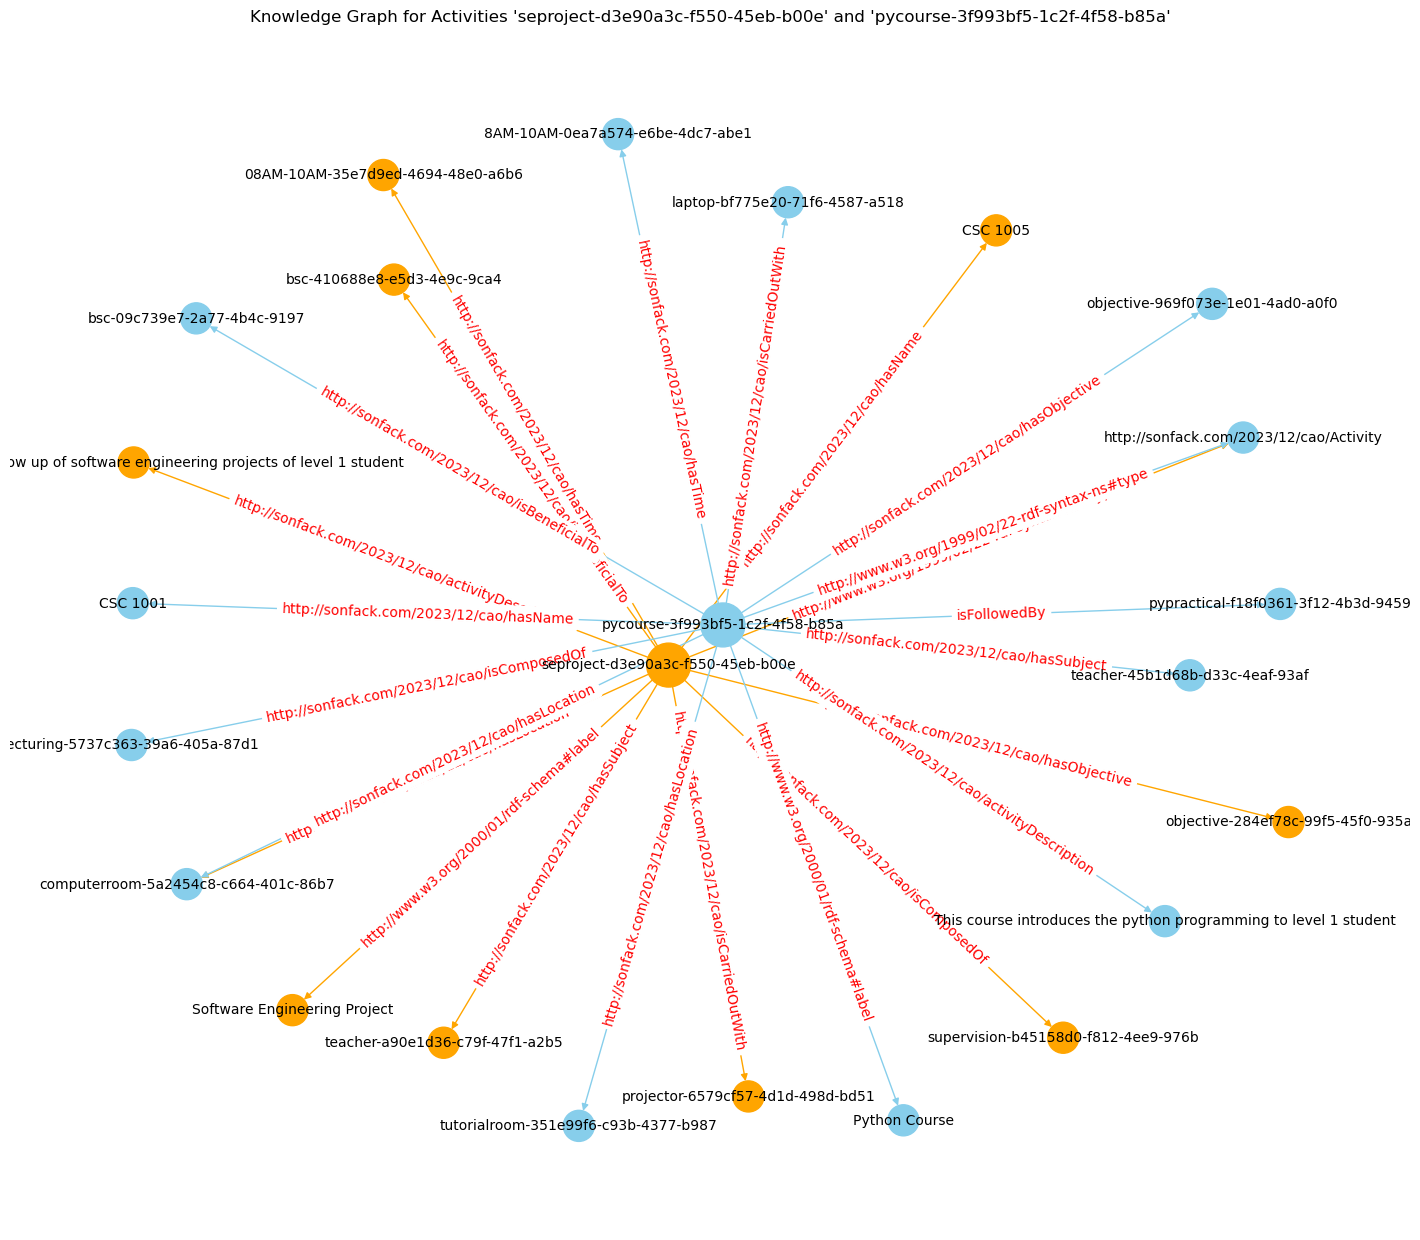


Knowledge Graph for Activities 'seproject-d3e90a3c-f550-45eb-b00e' and 'pycourse-3f993bf5-1c2f-4f58-b85a':
Nodes represent activities and associated resources.
Edges indicate types of relationships between activities and resources.


In [566]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
import re

# Load the RDF file
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.DiGraph()

# Define namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Function to extract and clean URI names
def extract_name(uri, namespace):
    """Extracts the proper name of a URI by removing identifiers and prefixes."""
    name = uri.replace(namespace, "")
    name = re.sub(r'-\w+$', '', name)  # Remove identifiers after a dash
    return name

# Function to read all activities
def read_all_activities(akg: Graph) -> list:
    """Returns all activities in a knowledge graph."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Function to get details of a specific activity
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Returns details of an activity in dictionary form."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        pred_label = extract_name(str(pred), str(akg_namespace))
        obj_label = extract_name(str(obj), str(akg_namespace))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Function to add a single activity and its relationships to the NetworkX graph as a separate block
def add_activity_block_to_graph(G, activity_uri, akg, color):
    """Adds a single activity and its relationships as a separate block in the NetworkX graph."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri), str(akg_namespace))
    
    for pred, objs in details.items():
        for obj in objs:
            G.add_node(activity_name, type="activity", color=color)
            G.add_node(obj, type="resource", color=color)
            G.add_edge(activity_name, obj, label=pred, color=color)

# Visualize a dual activity graph with each activity in its own block
def visualize_dual_activity_graph(G, activity_name1, activity_name2):
    """Visualizes the graph with each selected activity in its own block."""
    pos = nx.spring_layout(G, seed=42, k=0.3)  # Adjust layout for better separation
    plt.figure(figsize=(14, 12))

    # Retrieve colors for nodes and edges
    node_colors = [G.nodes[node].get("color", "skyblue") for node in G]
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]
    node_sizes = [1000 if G.nodes[node].get("type") == "activity" else 500 for node in G]

    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors, font_size=10)
    
    # Show edge labels without full URIs
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title(f"Knowledge Graph for Activities '{activity_name1}' and '{activity_name2}'")
    plt.show()

# Main function
def main():
    # List available activities
    all_activities = read_all_activities(g)
    print("Available Activities:")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity), str(akg_namespace))}")

    # Select the first activity
    while True:
        try:
            choice1 = int(input("Choose the first activity by number: ")) - 1
            if 0 <= choice1 < len(all_activities):
                break
            else:
                print("Invalid number. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    
    # Select the second activity
    while True:
        try:
            choice2 = int(input("Choose the second activity by number: ")) - 1
            if 0 <= choice2 < len(all_activities) and choice2 != choice1:
                break
            else:
                print("Invalid number or the same activity selected. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Get selected activities
    selected_activity1 = all_activities[choice1]
    selected_activity2 = all_activities[choice2]

    # Colors for each activity block
    color1 = "orange"
    color2 = "skyblue"

    # Add both activities and their relationships to the NetworkX graph as separate blocks
    add_activity_block_to_graph(G, selected_activity1, g, color1)
    add_activity_block_to_graph(G, selected_activity2, g, color2)
    
    # Extract names of activities for visualization
    activity_name1 = extract_name(str(selected_activity1), str(akg_namespace))
    activity_name2 = extract_name(str(selected_activity2), str(akg_namespace))
    
    # Visualize the knowledge graph centered on both activities
    visualize_dual_activity_graph(G, activity_name1, activity_name2)

    # Explanatory text
    print(f"\nKnowledge Graph for Activities '{activity_name1}' and '{activity_name2}':")
    print("Nodes represent activities and associated resources.")
    print("Edges indicate types of relationships between activities and resources.")

if __name__ == "__main__":
    main()


Available Activities:
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choose the first activity by number:  1
Choose the second activity by number:  3


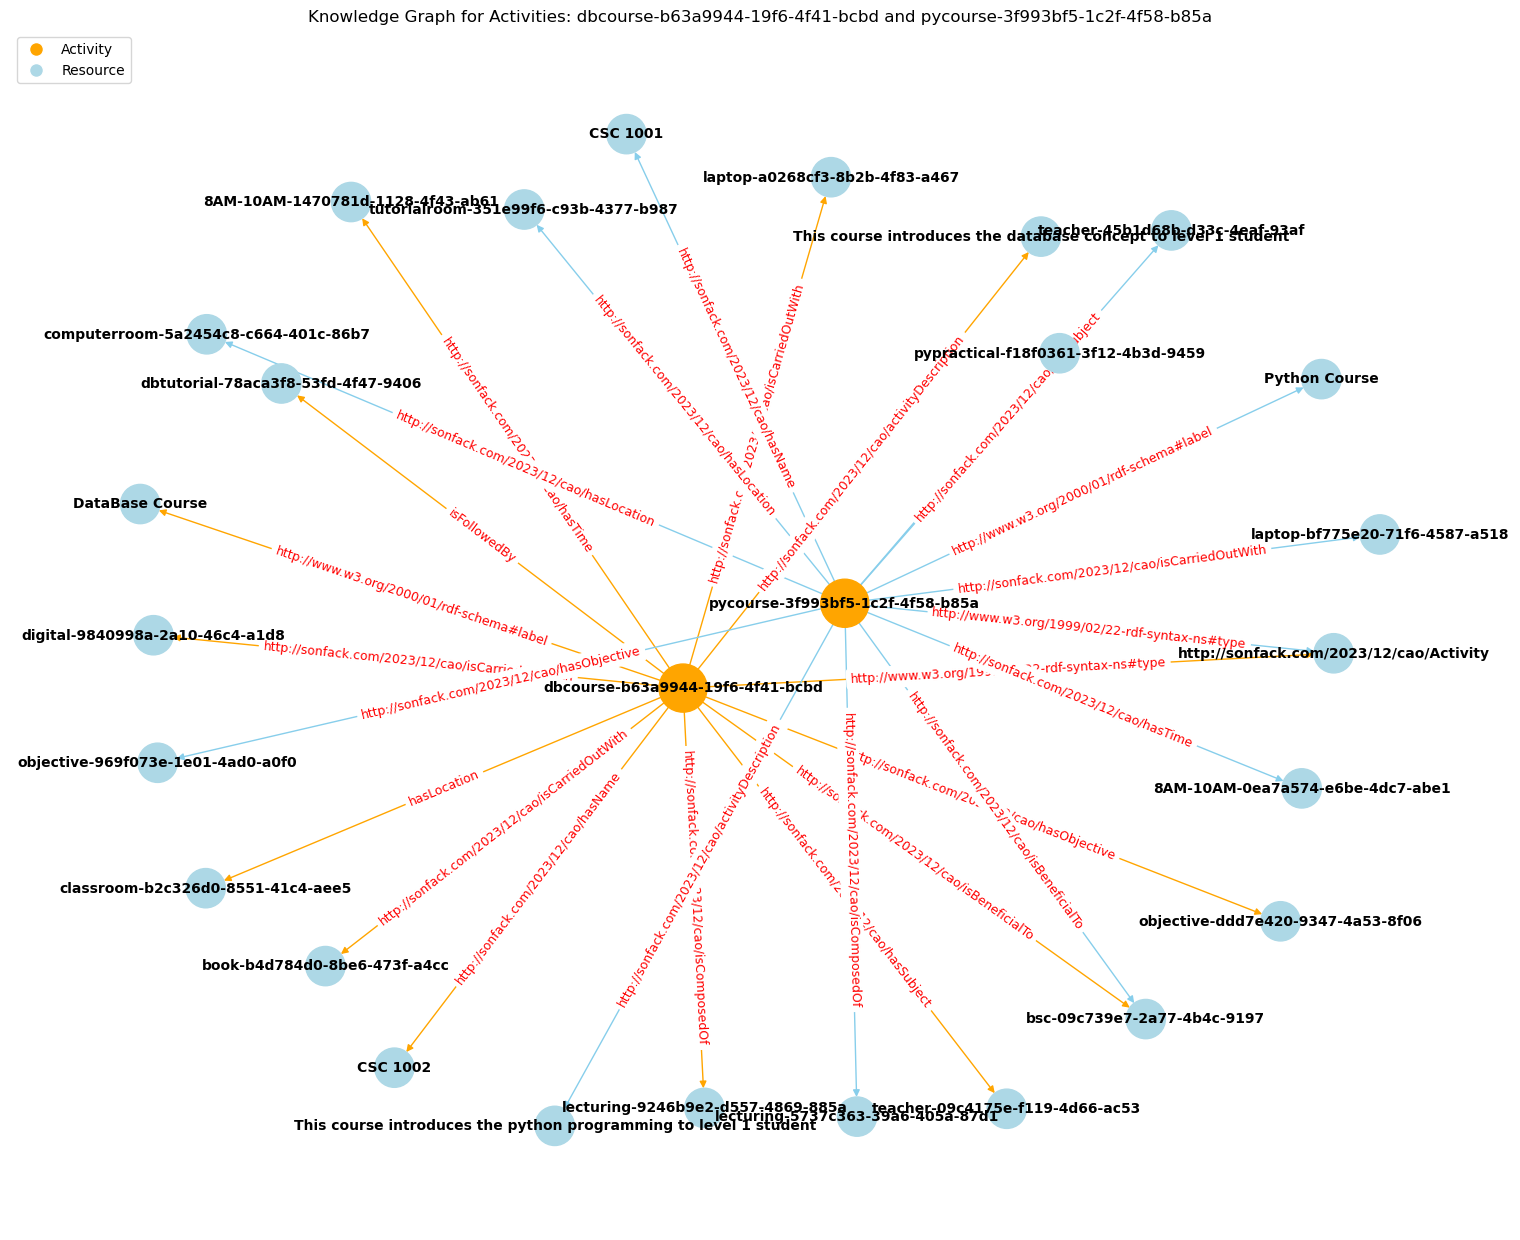

In [568]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
import re

# Load the RDF file
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.DiGraph()

# Define namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Function to extract and clean URI names
def extract_name(uri, namespace):
    """Extracts a clear name from a URI by removing the namespace and unique identifiers."""
    name = uri.replace(namespace, "")
    name = re.sub(r'-\w+$', '', name)  # Remove unique identifiers after a dash
    return name

# Function to read all activities
def read_all_activities(akg: Graph) -> list:
    """Returns all activities in the knowledge graph."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Function to get details of a specific activity
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Returns details of an activity in dictionary form."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        pred_label = extract_name(str(pred), str(akg_namespace))
        obj_label = extract_name(str(obj), str(akg_namespace))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Function to add a single activity and its relationships to the NetworkX graph as a block
def add_activity_block_to_graph(G, activity_uri, akg, color):
    """Adds a single activity and its relationships as a block in the NetworkX graph."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri), str(akg_namespace))
    
    for pred, objs in details.items():
        for obj in objs:
            G.add_node(activity_name, type="activity", color=color)
            G.add_node(obj, type="resource", color=color)
            G.add_edge(activity_name, obj, label=pred, color=color)

# Enhanced visualization for clear communication
def visualize_activity_graph(G, activity_names):
    """Visualizes the graph with each activity in its own block and clear labels."""
    pos = nx.spring_layout(G, seed=42, k=0.5)
    plt.figure(figsize=(15, 12))

    # Color coding for types of nodes
    node_colors = []
    node_labels = {}
    for node in G.nodes():
        if G.nodes[node].get("type") == "activity":
            node_colors.append("orange")
        else:
            node_colors.append("lightblue")
        # Use simplified names as labels
        node_labels[node] = node

    # Draw nodes and edges with improved labeling
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]
    node_sizes = [1200 if G.nodes[node].get("type") == "activity" else 800 for node in G]

    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=node_sizes, node_color=node_colors, font_size=10, edge_color=edge_colors, font_weight="bold")
    
    # Display edge labels with simplified names
    edge_labels = {edge: G.edges[edge]["label"] for edge in G.edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=9)

    # Add legend and title
    plt.title(f"Knowledge Graph for Activities: {' and '.join(activity_names)}")
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Activity', markersize=10, markerfacecolor='orange'),
        plt.Line2D([0], [0], marker='o', color='w', label='Resource', markersize=10, markerfacecolor='lightblue')
    ], loc="upper left")
    plt.show()

# Main function
def main():
    # List available activities
    all_activities = read_all_activities(g)
    print("Available Activities:")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity), str(akg_namespace))}")

    # Select the first activity
    choice1 = int(input("Choose the first activity by number: ")) - 1
    choice2 = int(input("Choose the second activity by number: ")) - 1

    selected_activity1 = all_activities[choice1]
    selected_activity2 = all_activities[choice2]

    # Colors for each activity block
    color1 = "orange"
    color2 = "skyblue"

    # Add both activities and their relationships to the NetworkX graph as separate blocks
    add_activity_block_to_graph(G, selected_activity1, g, color1)
    add_activity_block_to_graph(G, selected_activity2, g, color2)

    # Extract names of activities for visualization
    activity_name1 = extract_name(str(selected_activity1), str(akg_namespace))
    activity_name2 = extract_name(str(selected_activity2), str(akg_namespace))
    
    # Visualize the graph with blocks
    visualize_activity_graph(G, [activity_name1, activity_name2])

if __name__ == "__main__":
    main()


Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choisissez la première activité par numéro :  1
Choisissez la deuxième activité par numéro :  3


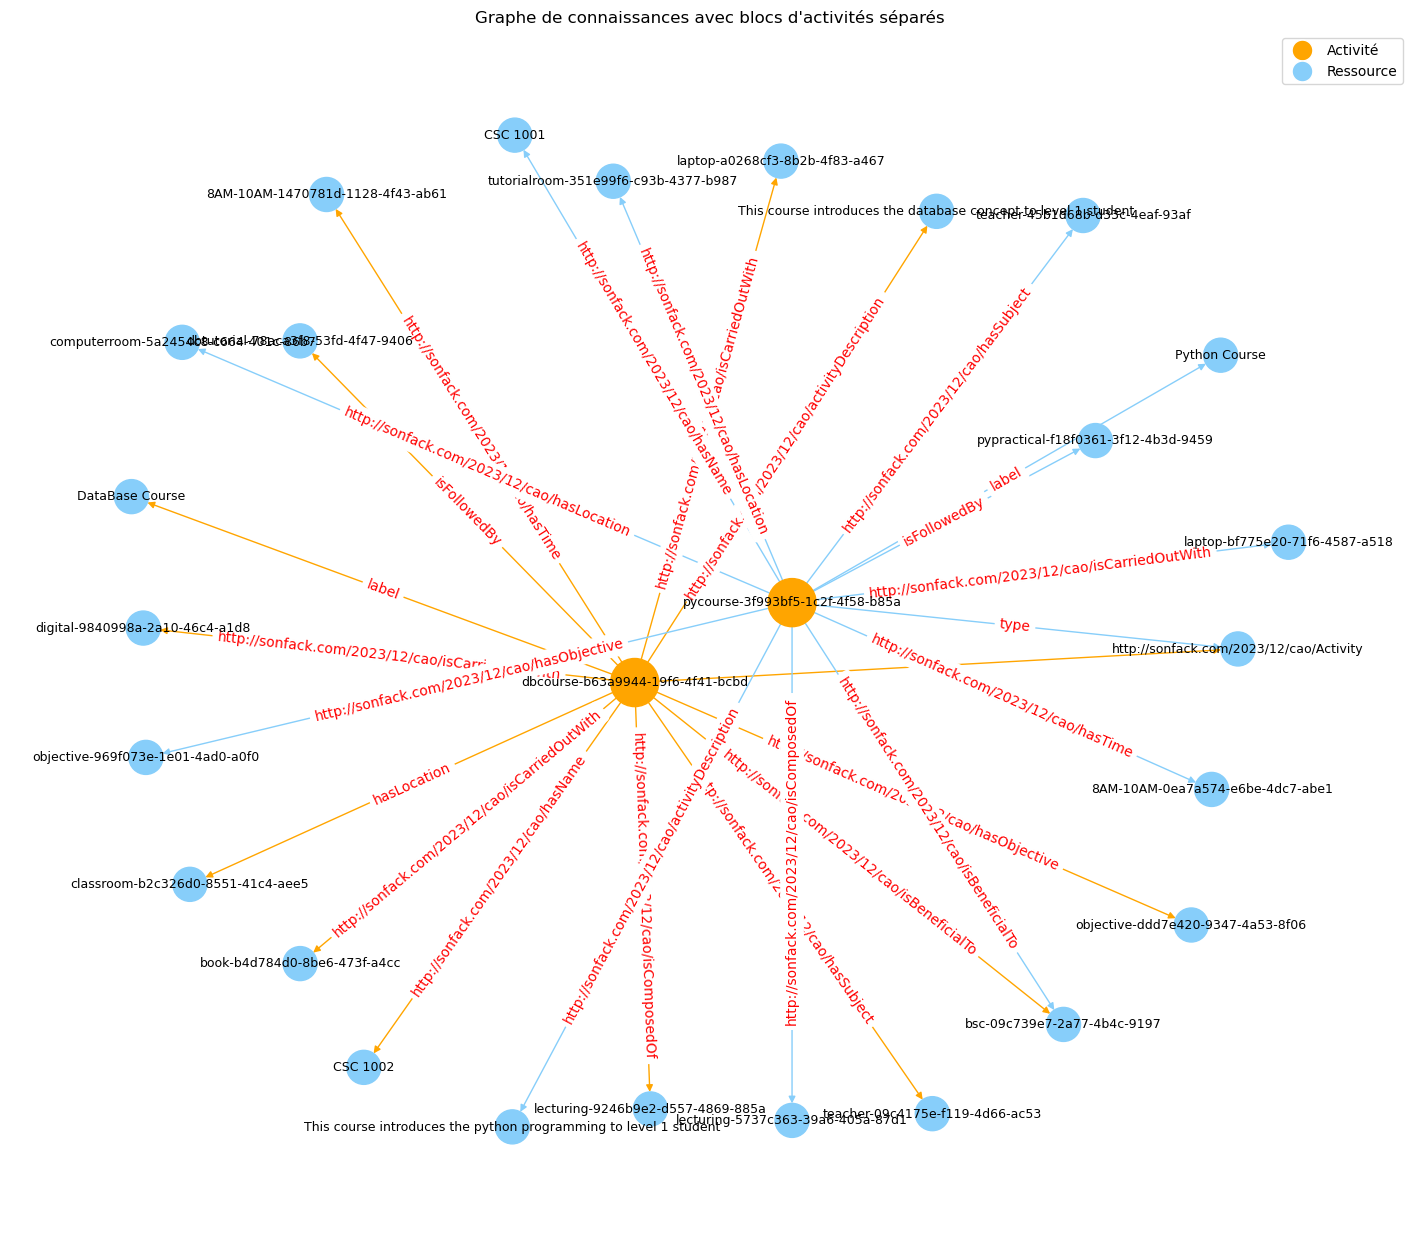

In [584]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
import re

# Load the RDF file
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.DiGraph()

# Define namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Function to extract and clean URI names
def extract_name(uri, namespace):
    """Extracts the proper name of a URI by removing identifiers and prefixes."""
    name = uri.replace(namespace, "")
    name = re.sub(r'-\w+$', '', name)  # Remove identifiers after a dash
    return name

# Function to read all activities
def read_all_activities(akg: Graph) -> list:
    """Returns all activities in a knowledge graph."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Function to get details of a specific activity
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Returns details of an activity in dictionary form."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        # Skip the specific resource "http://sonfack.com/2023/12/tao/Activity"
        if str(obj) == "http://sonfack.com/2023/12/tao/Activity":
            continue
        pred_label = extract_name(str(pred), str(akg_namespace))
        obj_label = extract_name(str(obj), str(akg_namespace))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Function to add a single activity and its relationships to the NetworkX graph with visual customization
def add_activity_block_to_graph(G, activity_uri, akg, color):
    """Adds a single activity and its relationships as a separate block in the NetworkX graph."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri), str(akg_namespace))
    
    for pred, objs in details.items():
        for obj in objs:
            G.add_node(activity_name, type="activité", color=color)
            G.add_node(obj, type="ressource", color=color)
            G.add_edge(activity_name, obj, label=pred, color=color)

# Enhanced visualization of the knowledge graph
def visualize_activity_graph(G):
    """Visualizes the knowledge graph with color coding and annotations."""
    
    # Positioning nodes with increased spacing
    pos = nx.spring_layout(G, seed=42, k=0.7, scale=10)
    plt.figure(figsize=(14, 12))

    # Color and size coding for nodes
    node_colors = ["#FFA500" if G.nodes[node].get("type") == "activité" else "#87CEFA" for node in G]
    node_sizes = [1200 if G.nodes[node].get("type") == "activité" else 600 for node in G]
    
    # Edge color coding
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]

    # Draw nodes and edges with customized attributes
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors, font_size=9)
    
    # Display edge labels without full URIs, focusing on meaningful names
    edge_labels = nx.get_edge_attributes(G, 'label')
    simplified_edge_labels = {key: re.sub(r'http.*#', '', label) for key, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=simplified_edge_labels, font_color="red")

    # Add a legend to explain the color coding
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Activité', markersize=15, markerfacecolor='#FFA500'),
        plt.Line2D([0], [0], marker='o', color='w', label='Ressource', markersize=15, markerfacecolor='#87CEFA')
    ], loc='upper right')

    plt.title("Graphe de connaissances avec blocs d'activités séparés")
    plt.show()

# Main function
def main():
    # List available activities
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity), str(akg_namespace))}")

    # Select activities
    while True:
        try:
            choice1 = int(input("Choisissez la première activité par numéro : ")) - 1
            choice2 = int(input("Choisissez la deuxième activité par numéro : ")) - 1
            if 0 <= choice1 < len(all_activities) and 0 <= choice2 < len(all_activities) and choice1 != choice2:
                break
            else:
                print("Choix non valides. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer des nombres.")

    # Add selected activities to the graph with different colors
    add_activity_block_to_graph(G, all_activities[choice1], g, "#FFA500")  # Orange for the first activity
    add_activity_block_to_graph(G, all_activities[choice2], g, "#87CEFA")  # Light blue for the second activity

    # Visualize the knowledge graph with enhanced styling
    visualize_activity_graph(G)

if __name__ == "__main__":
    main()


Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choisissez la première activité par numéro :  1
Choisissez la deuxième activité par numéro :  6


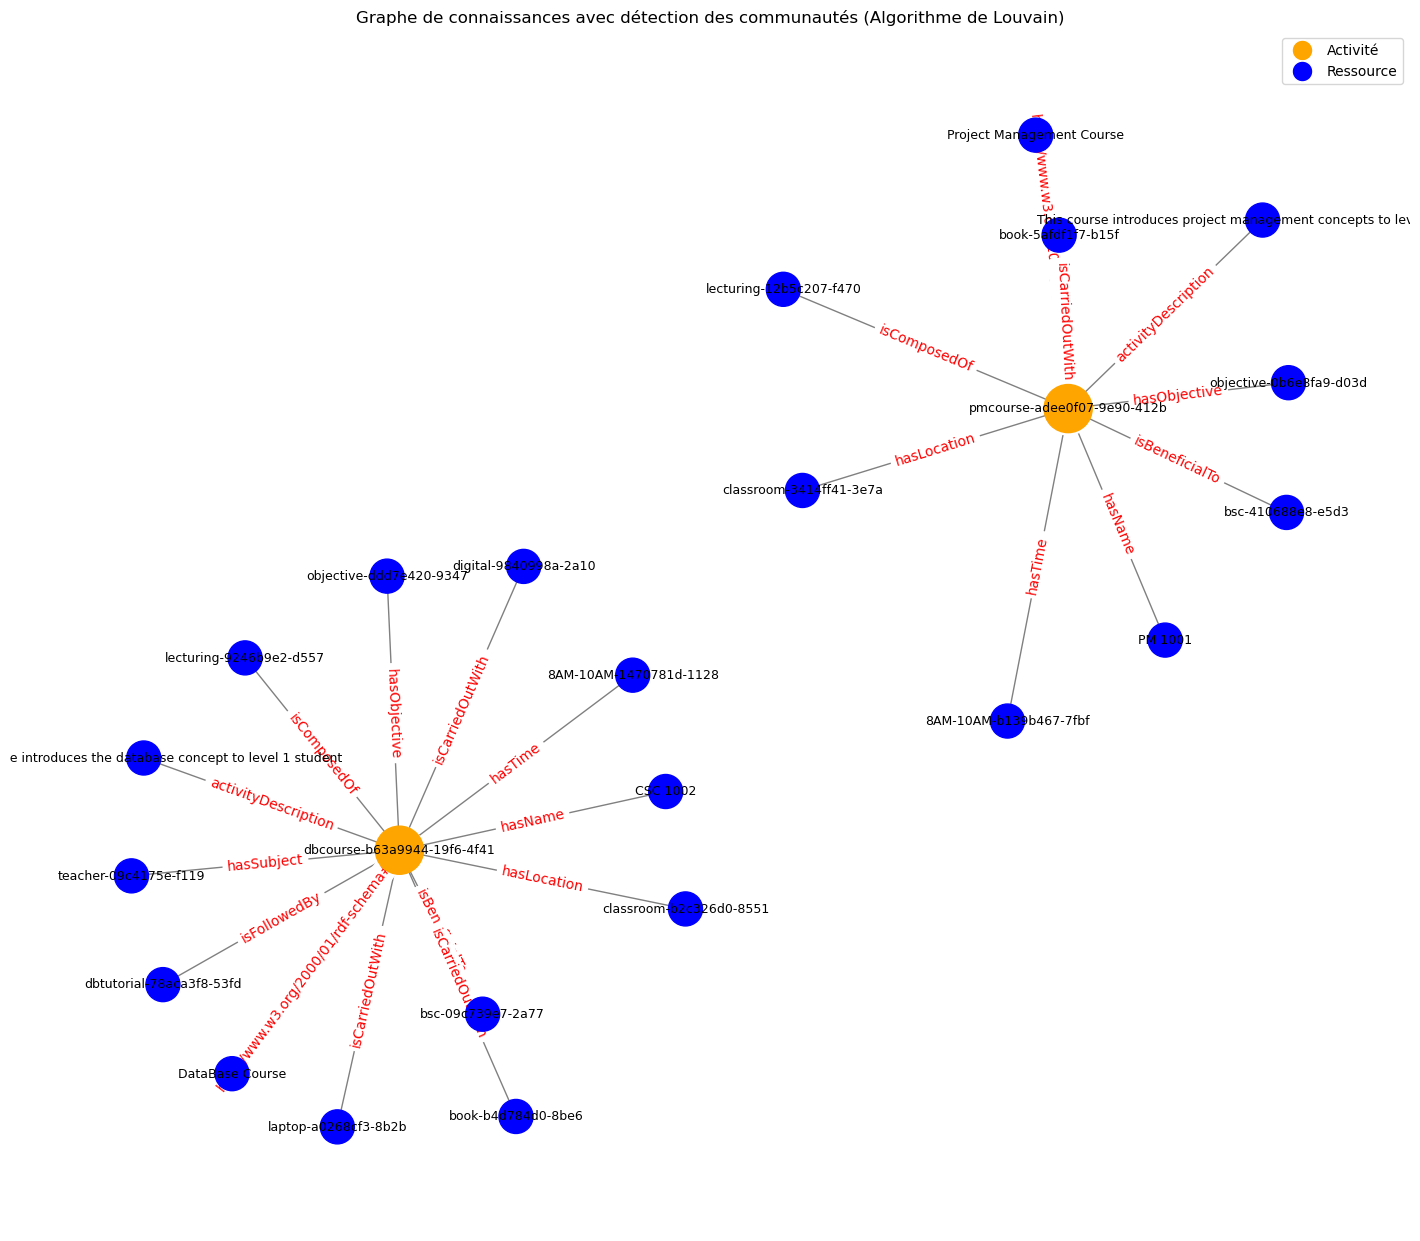

In [33]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  # Algorithme de Louvain pour la détection de communautés
import re

# Charger le fichier RDF
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.Graph()

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire et nettoyer les noms des URI
def extract_name(uri):
    """Extrait le nom propre d'un URI en supprimant les namespaces et les identifiants."""
    name = re.sub(r'http://sonfack\.com/2023/12/(tao|cao)/', '', uri)  # Supprimer les namespaces
    name = re.sub(r'-\w+$', '', name)  # Supprimer les identifiants après un tiret
    return name

# Fonction pour lire toutes les activités
def read_all_activities(akg: Graph) -> list:
    """Retourne toutes les activités dans un graphe de connaissances."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les détails d'une activité spécifique
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Retourne les détails d'une activité sous forme de dictionnaire."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        # Ignorer le type 'Activity' dans l'affichage
        if str(obj) == str(cao_namespace.Activity):
            continue
        pred_label = extract_name(str(pred))
        obj_label = extract_name(str(obj))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Fonction pour ajouter les activités et leurs relations au graphe NetworkX sans liaison entre les deux activités centrales
def add_activity_to_graph(G, activity_uri, akg, excluded_activity):
    """Ajoute une activité et ses relations au graphe NetworkX sans liaison avec une activité exclue."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri))
    
    for pred, objs in details.items():
        for obj in objs:
            obj_name = extract_name(str(obj))
            # Ne pas ajouter de lien direct entre les deux activités centrales
            if obj_name != excluded_activity:
                G.add_node(activity_name, type="activité", color="orange")  # Couleur orange pour les activités
                G.add_node(obj_name, type="ressource", color="blue")        # Couleur bleue pour les ressources
                G.add_edge(activity_name, obj_name, label=pred)

# Fonction pour appliquer l'algorithme de Louvain et obtenir des partitions
def apply_louvain_clustering(G):
    """Applique l'algorithme de Louvain pour détecter les communautés dans le graphe."""
    partition = community_louvain.best_partition(G)
    return partition

# Visualisation améliorée du graphe de connaissances avec les communautés détectées
def visualize_louvain_graph(G, partition):
    """Visualise le graphe avec les communautés détectées par l'algorithme de Louvain."""
    pos = nx.spring_layout(G, seed=42, k=0.5, scale=2)
    plt.figure(figsize=(14, 12))

    # Couleur et taille des nœuds pour les activités et les ressources
    node_colors = ["orange" if G.nodes[node].get("type") == "activité" else "blue" for node in G]
    node_sizes = [1200 if G.nodes[node].get("type") == "activité" else 600 for node in G]

    # Couleur des arêtes
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]

    # Dessiner les nœuds et les arêtes
    nx.draw(G, pos, with_labels=True, labels={node: extract_name(node) for node in G.nodes()},
            node_size=node_sizes, node_color=node_colors, edge_color=edge_colors, font_size=9)
    
    # Afficher les étiquettes des arêtes sans URI complet
    edge_labels = nx.get_edge_attributes(G, 'label')
    simplified_edge_labels = {key: extract_name(label) for key, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=simplified_edge_labels, font_color="red")

    # Légende pour les couleurs des nœuds
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Activité', markersize=15, markerfacecolor='orange'),
        plt.Line2D([0], [0], marker='o', color='w', label='Ressource', markersize=15, markerfacecolor='blue')
    ], loc='upper right')

    plt.title("Graphe de connaissances avec détection des communautés (Algorithme de Louvain)")
    plt.show()

# Fonction principale
def main():
    # Liste des activités disponibles
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity))}")

    # Sélection des activités
    while True:
        try:
            choice1 = int(input("Choisissez la première activité par numéro : ")) - 1
            choice2 = int(input("Choisissez la deuxième activité par numéro : ")) - 1
            if 0 <= choice1 < len(all_activities) and 0 <= choice2 < len(all_activities) and choice1 != choice2:
                break
            else:
                print("Choix non valides. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer des nombres.")

    # Obtenir les noms des activités pour l'exclusion
    activity1_name = extract_name(str(all_activities[choice1]))
    activity2_name = extract_name(str(all_activities[choice2]))

    # Ajouter les activités sélectionnées au graphe NetworkX sans liaison directe
    add_activity_to_graph(G, all_activities[choice1], g, excluded_activity=activity2_name)
    add_activity_to_graph(G, all_activities[choice2], g, excluded_activity=activity1_name)

    # Appliquer l'algorithme de Louvain pour détecter les communautés
    partition = apply_louvain_clustering(G)

    # Visualiser le graphe avec les communautés détectées
    visualize_louvain_graph(G, partition)

if __name__ == "__main__":
    main()


Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choisissez la première activité par numéro :  10
Choisissez la deuxième activité par numéro :  8


Modularité du graphe d'activités : 0.45238095238095233


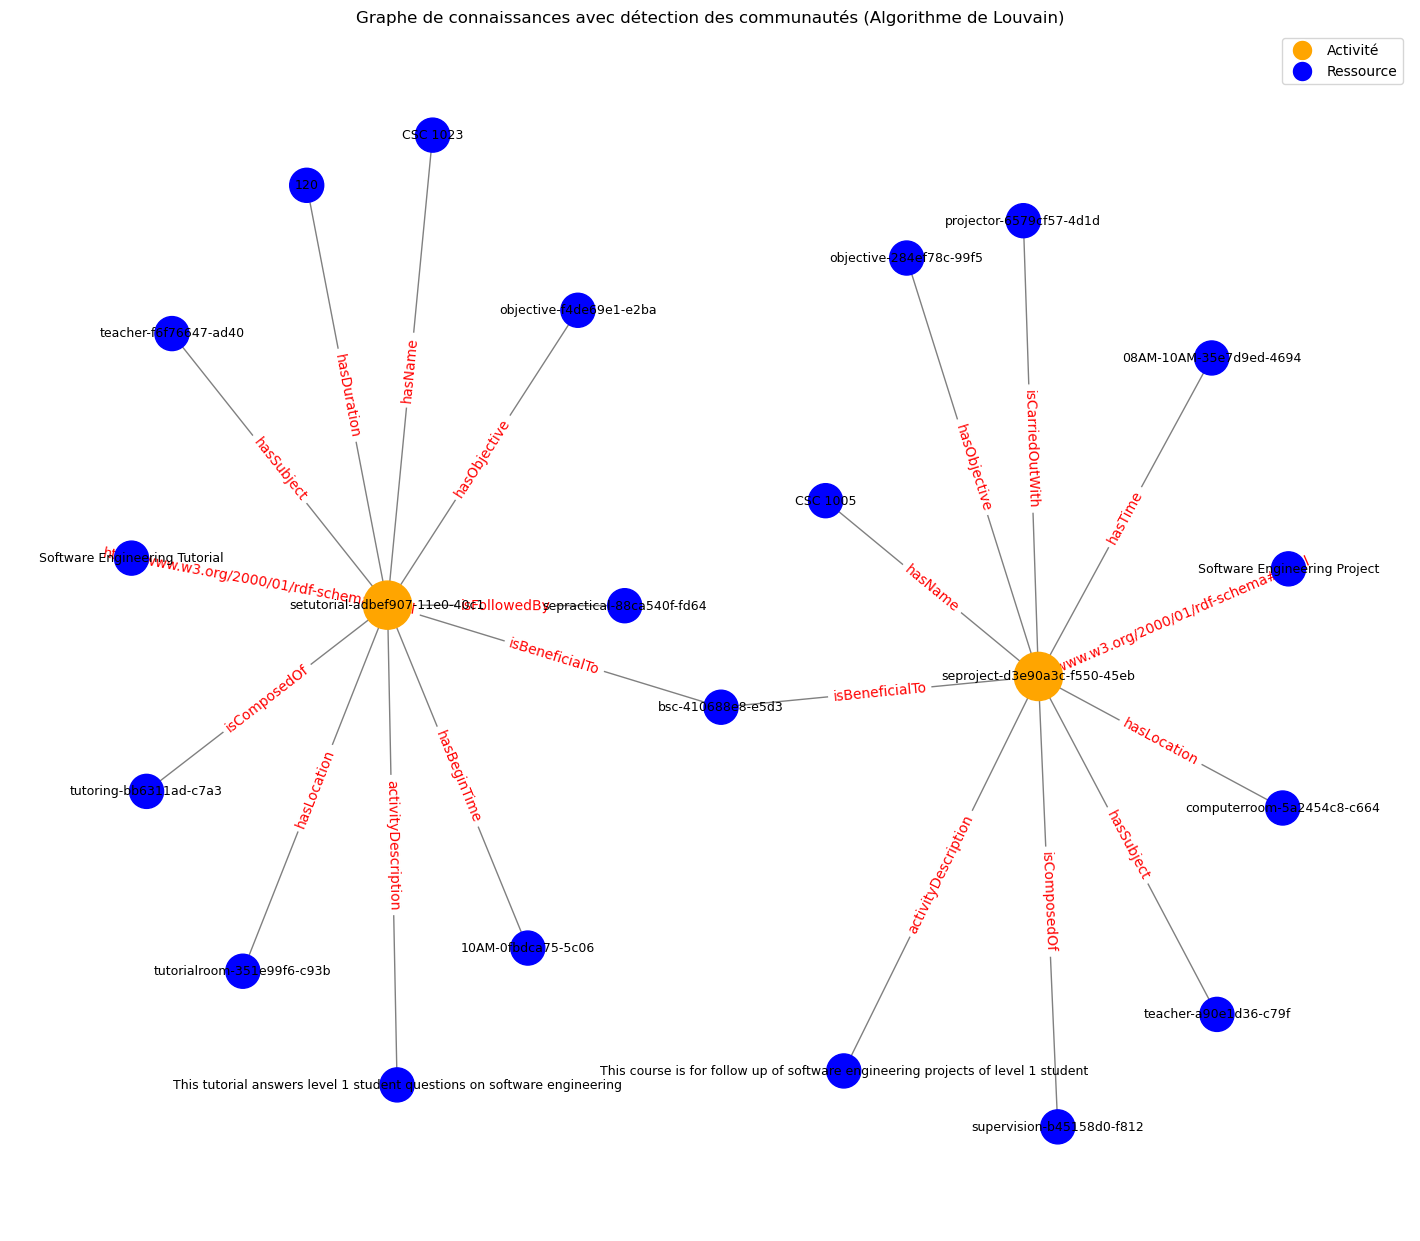

In [35]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  # Algorithme de Louvain pour la détection de communautés
import re

# Charger le fichier RDF
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.Graph()

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire et nettoyer les noms des URI
def extract_name(uri):
    """Extrait le nom propre d'un URI en supprimant les namespaces et les identifiants."""
    name = re.sub(r'http://sonfack\.com/2023/12/(tao|cao)/', '', uri)  # Supprimer les namespaces
    name = re.sub(r'-\w+$', '', name)  # Supprimer les identifiants après un tiret
    return name

# Fonction pour lire toutes les activités
def read_all_activities(akg: Graph) -> list:
    """Retourne toutes les activités dans un graphe de connaissances."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les détails d'une activité spécifique
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Retourne les détails d'une activité sous forme de dictionnaire."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        # Ignorer le type 'Activity' dans l'affichage
        if str(obj) == str(cao_namespace.Activity):
            continue
        pred_label = extract_name(str(pred))
        obj_label = extract_name(str(obj))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Fonction pour ajouter les activités et leurs relations au graphe NetworkX sans liaison entre les deux activités centrales
def add_activity_to_graph(G, activity_uri, akg, excluded_activity):
    """Ajoute une activité et ses relations au graphe NetworkX sans liaison avec une activité exclue."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri))
    
    for pred, objs in details.items():
        for obj in objs:
            obj_name = extract_name(str(obj))
            # Ne pas ajouter de lien direct entre les deux activités centrales
            if obj_name != excluded_activity:
                G.add_node(activity_name, type="activité", color="orange")  # Couleur orange pour les activités
                G.add_node(obj_name, type="ressource", color="blue")        # Couleur bleue pour les ressources
                G.add_edge(activity_name, obj_name, label=pred)

# Fonction pour appliquer l'algorithme de Louvain et obtenir des partitions
def apply_louvain_clustering(G):
    """Applique l'algorithme de Louvain pour détecter les communautés dans le graphe."""
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)  # Calculer la modularité
    return partition, modularity

# Visualisation améliorée du graphe de connaissances avec les communautés détectées
def visualize_louvain_graph(G, partition):
    """Visualise le graphe avec les communautés détectées par l'algorithme de Louvain."""
    pos = nx.spring_layout(G, seed=42, k=0.5, scale=2)
    plt.figure(figsize=(14, 12))

    # Couleur et taille des nœuds pour les activités et les ressources
    node_colors = ["orange" if G.nodes[node].get("type") == "activité" else "blue" for node in G]
    node_sizes = [1200 if G.nodes[node].get("type") == "activité" else 600 for node in G]

    # Couleur des arêtes
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]

    # Dessiner les nœuds et les arêtes
    nx.draw(G, pos, with_labels=True, labels={node: extract_name(node) for node in G.nodes()},
            node_size=node_sizes, node_color=node_colors, edge_color=edge_colors, font_size=9)
    
    # Afficher les étiquettes des arêtes sans URI complet
    edge_labels = nx.get_edge_attributes(G, 'label')
    simplified_edge_labels = {key: extract_name(label) for key, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=simplified_edge_labels, font_color="red")

    # Légende pour les couleurs des nœuds
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Activité', markersize=15, markerfacecolor='orange'),
        plt.Line2D([0], [0], marker='o', color='w', label='Ressource', markersize=15, markerfacecolor='blue')
    ], loc='upper right')

    plt.title("Graphe de connaissances avec détection des communautés (Algorithme de Louvain)")
    plt.show()

# Fonction principale
def main():
    # Liste des activités disponibles
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity))}")

    # Sélection des activités
    while True:
        try:
            choice1 = int(input("Choisissez la première activité par numéro : ")) - 1
            choice2 = int(input("Choisissez la deuxième activité par numéro : ")) - 1
            if 0 <= choice1 < len(all_activities) and 0 <= choice2 < len(all_activities) and choice1 != choice2:
                break
            else:
                print("Choix non valides. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer des nombres.")

    # Obtenir les noms des activités pour l'exclusion
    activity1_name = extract_name(str(all_activities[choice1]))
    activity2_name = extract_name(str(all_activities[choice2]))

    # Ajouter les activités sélectionnées au graphe NetworkX sans liaison directe
    add_activity_to_graph(G, all_activities[choice1], g, excluded_activity=activity2_name)
    add_activity_to_graph(G, all_activities[choice2], g, excluded_activity=activity1_name)

    # Appliquer l'algorithme de Louvain pour détecter les communautés et obtenir la modularité
    partition, modularity = apply_louvain_clustering(G)

    # Afficher la modularité
    print(f"Modularité du graphe d'activités : {modularity}")

    # Visualiser le graphe avec les communautés détectées
    visualize_louvain_graph(G, partition)

if __name__ == "__main__":
    main()


Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choisissez la première activité par numéro :  1
Choisissez la deuxième activité par numéro :  2


Modularité du graphe d'activités : 0.41919999999999996


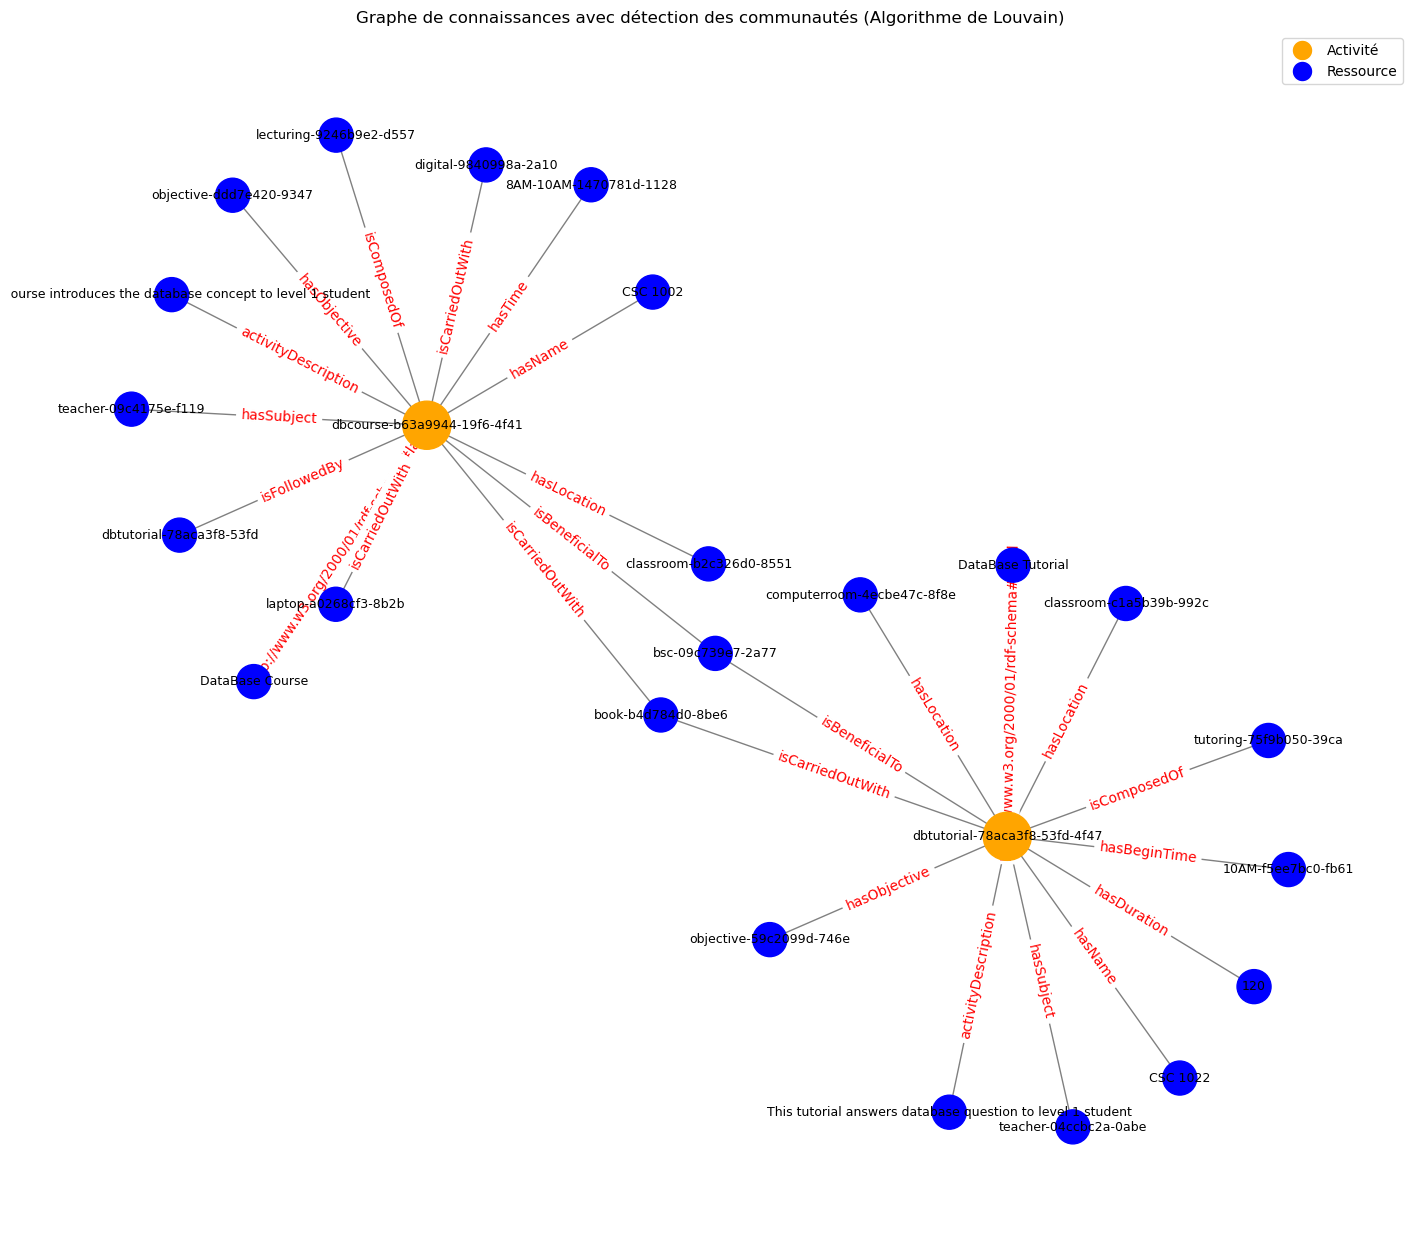

In [67]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  # Algorithme de Louvain pour la détection de communautés
import re

# Charger le fichier RDF
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)  # Chargement du fichier RDF
G = nx.Graph()  # Création d'un graphe NetworkX

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire et nettoyer les noms des URI
def extract_name(uri):
    """Extrait le nom propre d'un URI en supprimant les namespaces et les identifiants."""
    name = re.sub(r'http://sonfack\.com/2023/12/(tao|cao)/', '', uri)  # Supprimer les namespaces
    name = re.sub(r'-\w+$', '', name)  # Supprimer les identifiants après un tiret
    return name


# Visualisation du graphe global avec les communautés

def visualize_communities_separately(G, partition):
    communities = set(partition.values())
    for community_id in communities:
        subgraph_nodes = [node for node, comm in partition.items() if comm == community_id]
        H = G.subgraph(subgraph_nodes)
        pos = nx.spring_layout(H, seed=42)
        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(H, pos, node_color=f"C{community_id % 10}", node_size=300, cmap=plt.cm.Set1)
        nx.draw_networkx_edges(H, pos, edge_color="gray", alpha=0.5)
        node_labels = {node: node for node in H.nodes()}
        nx.draw_networkx_labels(H, pos, labels=node_labels, font_size=8, font_weight="bold", font_color="black")
        edge_labels = nx.get_edge_attributes(H, 'label')
        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_color='red', font_size=10)
        plt.title(f"Communauté {community_id} dans le Graphe de Connaissances")
        plt.show()

# Fonction pour lire toutes les activités
def read_all_activities(akg: Graph) -> list:
    """Retourne toutes les activités dans un graphe de connaissances."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les détails d'une activité spécifique
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Retourne les détails d'une activité sous forme de dictionnaire."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        if str(obj) == str(cao_namespace.Activity):  # Ignorer le type 'Activity'
            continue
        pred_label = extract_name(str(pred))
        obj_label = extract_name(str(obj))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Fonction pour ajouter les activités et leurs relations au graphe NetworkX sans liaison entre les deux activités centrales
def add_activity_to_graph(G, activity_uri, akg, excluded_activity):
    """Ajoute une activité et ses relations au graphe NetworkX sans liaison avec une activité exclue."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri))
    
    for pred, objs in details.items():
        for obj in objs:
            obj_name = extract_name(str(obj))
            if obj_name != excluded_activity:
                G.add_node(activity_name, type="activité", color="orange")  # Couleur orange pour les activités
                G.add_node(obj_name, type="ressource", color="blue")        # Couleur bleue pour les ressources
                G.add_edge(activity_name, obj_name, label=pred)

# Fonction pour appliquer l'algorithme de Louvain et obtenir des partitions
def apply_louvain_clustering(G):
    """Applique l'algorithme de Louvain pour détecter les communautés dans le graphe."""
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)  # Calculer la modularité
    return partition, modularity

# Visualisation du graphe de connaissances avec les communautés détectées
def visualize_louvain_graph(G, partition):
    """Visualise le graphe avec les communautés détectées par l'algorithme de Louvain."""
    pos = nx.spring_layout(G, seed=42, k=0.5, scale=2)
    plt.figure(figsize=(14, 12))

    # Couleur et taille des nœuds pour les activités et les ressources
    node_colors = ["orange" if G.nodes[node].get("type") == "activité" else "blue" for node in G]
    node_sizes = [1200 if G.nodes[node].get("type") == "activité" else 600 for node in G]

    # Couleur des arêtes
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]

    # Dessiner les nœuds et les arêtes
    nx.draw(G, pos, with_labels=True, labels={node: extract_name(node) for node in G.nodes()},
            node_size=node_sizes, node_color=node_colors, edge_color=edge_colors, font_size=9)
    
    # Afficher les étiquettes des arêtes sans URI complet
    edge_labels = nx.get_edge_attributes(G, 'label')
    simplified_edge_labels = {key: extract_name(label) for key, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=simplified_edge_labels, font_color="red")

    # Légende pour les couleurs des nœuds
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Activité', markersize=15, markerfacecolor='orange'),
        plt.Line2D([0], [0], marker='o', color='w', label='Ressource', markersize=15, markerfacecolor='blue')
    ], loc='upper right')

    plt.title("Graphe de connaissances avec détection des communautés (Algorithme de Louvain)")
    plt.show()

# Fonction principale
def main():
    # Liste des activités disponibles
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity))}")

    # Sélection des activités
    while True:
        try:
            choice1 = int(input("Choisissez la première activité par numéro : ")) - 1
            choice2 = int(input("Choisissez la deuxième activité par numéro : ")) - 1
            if 0 <= choice1 < len(all_activities) and 0 <= choice2 < len(all_activities) and choice1 != choice2:
                break
            else:
                print("Choix non valides. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer des nombres.")

    # Obtenir les noms des activités pour l'exclusion
    activity1_name = extract_name(str(all_activities[choice1]))
    activity2_name = extract_name(str(all_activities[choice2]))

    # Ajouter les activités sélectionnées au graphe NetworkX sans liaison directe
    add_activity_to_graph(G, all_activities[choice1], g, excluded_activity=activity2_name)
    add_activity_to_graph(G, all_activities[choice2], g, excluded_activity=activity1_name)

    # Appliquer l'algorithme de Louvain pour détecter les communautés et obtenir la modularité
    partition, modularity = apply_louvain_clustering(G)

    # Afficher la modularité
    print(f"Modularité du graphe d'activités : {modularity}")

    # Visualiser le graphe avec les communautés détectées
    visualize_louvain_graph(G, partition)

if __name__ == "__main__":
    main()


In [39]:
import json

# Définir les paramètres pour l'algorithme de Louvain
louvain_params = {
    "resolution": 1.0,
    "random_state": 42
}

# Écrire les paramètres dans un fichier JSON
with open("louvain_params.json", "w") as file:
    json.dump(louvain_params, file)

print("Fichier louvain_params.json créé avec succès.")


Fichier louvain_params.json créé avec succès.


Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e

Options :
1 - Visualiser toutes les communautés séparément
2 - Visualiser une seule communauté par nom d'activité
3 - Visualiser plusieurs activités pour étude
4 - Détecter les communautés par type de ressource
5 - Quitter


Entrez le numéro de votre choix :  4
Entrez le type de ressource (e.g., hasObjective) :  hasObjective


Modularité selon le type de ressource 'hasObjective' : 0.7901234567901234


D:\anacondao\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


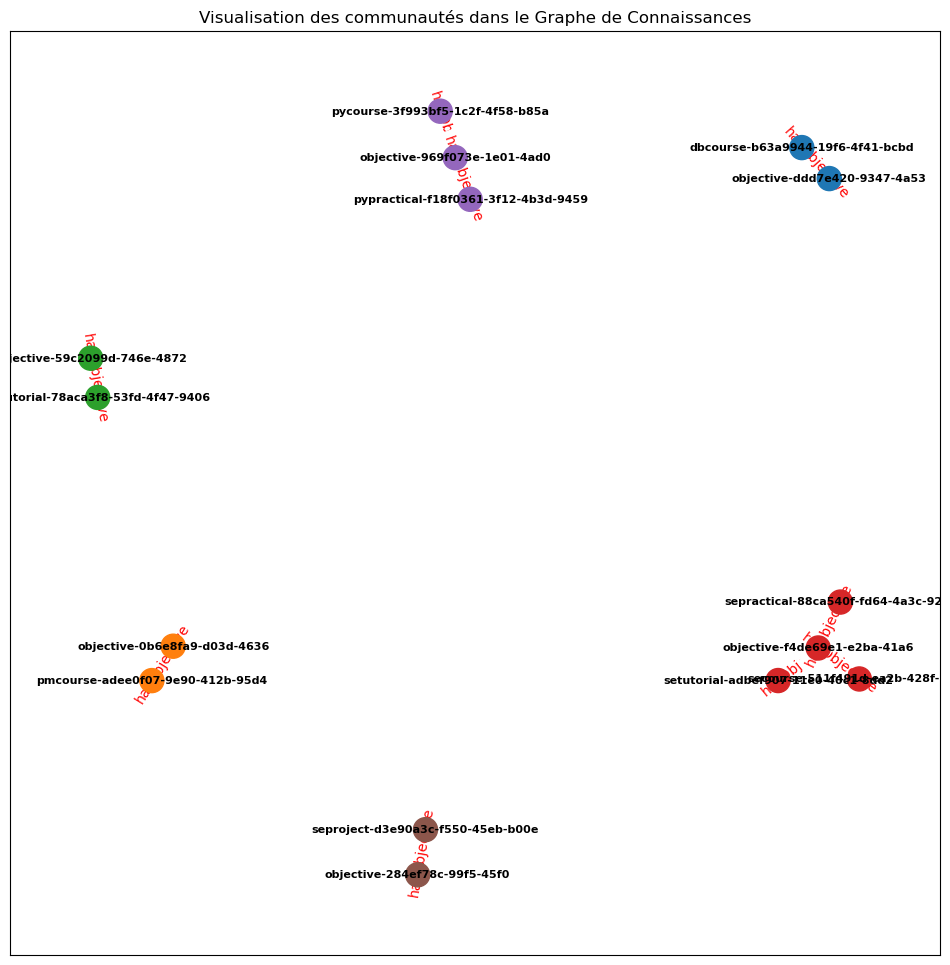


Options :
1 - Visualiser toutes les communautés séparément
2 - Visualiser une seule communauté par nom d'activité
3 - Visualiser plusieurs activités pour étude
4 - Détecter les communautés par type de ressource
5 - Quitter


KeyboardInterrupt: Interrupted by user

In [65]:
#### import json
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import re

# Charger les paramètres de Louvain depuis un fichier JSON
def load_louvain_params(json_file):
    with open(json_file, "r") as file:
        params = json.load(file)
    return params

# Charger le fichier RDF et initialiser le graphe NetworkX
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.Graph()

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire et nettoyer les noms des URI
def extract_name(uri):
    name = re.sub(r'http://sonfack\.com/2023/12/(tao|cao)/', '', uri)
    name = re.sub(r'-\w+$', '', name)
    return name

# Fonction pour lire toutes les activités
def read_all_activities(akg: Graph) -> list:
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les détails d'une activité spécifique
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        if str(obj) == str(cao_namespace.Activity):
            continue
        pred_label = extract_name(str(pred))
        obj_label = extract_name(str(obj))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Fonction pour ajouter les activités et leurs relations au graphe NetworkX sans liaison entre les deux activités centrales
def add_activity_to_graph(G, activity_uri, akg, excluded_activity=None, resource_type=None):
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri))
    
    for pred, objs in details.items():
        if resource_type and pred != resource_type:
            continue
        for obj in objs:
            obj_name = extract_name(str(obj))
            if obj_name != excluded_activity:
                G.add_node(activity_name, type="activité", color="orange")
                G.add_node(obj_name, type="ressource", color="blue")
                G.add_edge(activity_name, obj_name, label=pred)

# Appliquer l'algorithme de Louvain pour obtenir des partitions
def apply_louvain_clustering(G):
    if G.number_of_edges() == 0:
        print("Erreur : Le graphe ne contient aucun lien après filtrage. Modularité non définie.")
        return None, None
    
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)
    return partition, modularity

# Visualiser tout le graphe avec les communautés détectées
def visualize_graph_with_communities(G, partition):
    plt.figure(figsize=(12, 12))
    community_colors = [f"C{community_id % 10}" for community_id in partition.values()]
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=300, cmap=plt.cm.Set1)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)
    node_labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_weight="bold", font_color="black")
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
    plt.title("Visualisation des communautés dans le Graphe de Connaissances")
    plt.show()

# Visualiser chaque communauté séparément
def visualize_communities_separately(G, partition):
    communities = set(partition.values())
    for community_id in communities:
        subgraph_nodes = [node for node, comm in partition.items() if comm == community_id]
        H = G.subgraph(subgraph_nodes)
        pos = nx.spring_layout(H, seed=42)
        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(H, pos, node_color=f"C{community_id % 10}", node_size=300, cmap=plt.cm.Set1)
        nx.draw_networkx_edges(H, pos, edge_color="gray", alpha=0.5)
        node_labels = {node: node for node in H.nodes()}
        nx.draw_networkx_labels(H, pos, labels=node_labels, font_size=8, font_weight="bold", font_color="black")
        edge_labels = nx.get_edge_attributes(H, 'label')
        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_color='red', font_size=10)
        plt.title(f"Communauté {community_id} dans le Graphe de Connaissances")
        plt.show()

# Visualiser une seule communauté en fonction de l'activité spécifiée
def visualize_single_community(G, partition, activity_name):
    community_id = partition.get(activity_name)
    if community_id is not None:
        subgraph_nodes = [node for node, comm in partition.items() if comm == community_id]
        subgraph = G.subgraph(subgraph_nodes)
        visualize_communities_separately(subgraph, {node: partition[node] for node in subgraph_nodes})
    else:
        print("Activité non trouvée.")

# Visualiser plusieurs activités pour étude
def visualize_multiple_activities(G, selected_activities, g):
    G.clear()
    for activity_uri in selected_activities:
        add_activity_to_graph(G, activity_uri, g)
    partition, modularity = apply_louvain_clustering(G)
    if partition is not None:
        print(f"Modularité du sous-graphe d'activités sélectionnées : {modularity}")
        visualize_graph_with_communities(G, partition)

# Fonction principale pour l'interaction utilisateur
def main():
    louvain_params = load_louvain_params("louvain_params.json")
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity))}")

    while True:
        print("\nOptions :")
        print("1 - Visualiser toutes les communautés séparément")
        print("2 - Visualiser une seule communauté par nom d'activité")
        print("3 - Visualiser plusieurs activités pour étude")
        print("4 - Détecter les communautés par type de ressource")
        print("5 - Quitter")

        choice = input("Entrez le numéro de votre choix : ").strip()
        if choice == "1":
            partition, modularity = apply_louvain_clustering(G)
            if partition is not None:
                print(f"Modularité globale : {modularity}")
                visualize_communities_separately(G, partition)
        elif choice == "2":
            activity_name = input("Entrez le nom de l'activité : ").strip()
            partition, modularity = apply_louvain_clustering(G)
            if partition is not None:
                visualize_single_community(G, partition, activity_name)
        elif choice == "3":
            activity_indices = input("Entrez les numéros des activités, séparés par des virgules : ").split(',')
            selected_activities = [all_activities[int(index) - 1] for index in activity_indices]
            visualize_multiple_activities(G, selected_activities, g)
        elif choice == "4":
            resource_type = input("Entrez le type de ressource (e.g., hasObjective) : ").strip()
            G.clear()
            for activity_uri in all_activities:
                add_activity_to_graph(G, activity_uri, g, resource_type=resource_type)
            partition, modularity = apply_louvain_clustering(G)
            if partition is not None:
                print(f"Modularité selon le type de ressource '{resource_type}' : {modularity}")
                visualize_graph_with_communities(G, partition)
        elif choice == "5":
            print("Fin du programme.")
            break
        else:
            print("Choix invalide. Veuillez réessayer.")

if __name__ == "__main__":
    main()


In [61]:
from rdflib import Graph, RDF, URIRef, Namespace
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Chargement des données RDF
graph = Graph()
graph.parse("teaching_akg.ttl", format="ttl")

# Définir l'espace de noms pour les entités (ajuster si nécessaire)
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Remplacez par votre espace de noms réel

# Extraire et imprimer les assertions pertinentes
relevant_assertions = []

for subj, pred, obj in graph:
    # Exclure les sujets et prédicats commençant par "has" ou "is"
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        relevant_assertions.append((subj, pred, obj))

# Créer un graphe NetworkX à partir des assertions pertinentes
G = nx.DiGraph()

for subj, pred, obj in relevant_assertions:
    G.add_edge(str(subj), str(obj), label=str(pred))

# Impression des assertions pertinentes
for subj, pred, obj in relevant_assertions:
    print(f"Subject: {subj.split('#')[-1]}\nPredicate: {pred.split('#')[-1]}\nObject: {obj.split('#')[-1]}\n")

# Détection des communautés à l'aide de Louvain
partition = community_louvain.best_partition(G)

# Préparation des couleurs pour chaque communauté
color_map = []
for node in G:
    color_map.append(partition[node])

# Visualisation
plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, font_weight='bold', node_size=500)
plt.title('Visualisation des assertions pertinentes dans le graphe')
plt.show()


Subject: http://sonfack.com/2023/12/tao/digital-8df1b194-5e61-489b-ab31-366843c55775
Predicate: http://sonfack.com/2023/12/cao/hasName
Object: Learn Python - Full Course for Beginners

Subject: http://sonfack.com/2023/12/tao/pycourse-3f993bf5-1c2f-4f58-b85a-7b6b92bcf64b
Predicate: http://sonfack.com/2023/12/cao/hasSubject
Object: http://sonfack.com/2023/12/tao/teacher-45b1d68b-d33c-4eaf-93af-7c44f8ef3fa8

Subject: http://sonfack.com/2023/12/tao/laptop-a206be12-21fb-4fbf-b40b-4459b1cf4348
Predicate: http://sonfack.com/2023/12/tao/isUsedFor
Object: http://sonfack.com/2023/12/tao/secourse-511f491d-ea2b-428f-900e-604ea778dab5

Subject: http://sonfack.com/2023/12/tao/tutorialroom-57179062-99d4-4da0-88b4-e800809fac73
Predicate: http://sonfack.com/2023/12/cao/hasName
Object: TR001

Subject: http://sonfack.com/2023/12/tao/Video
Predicate: subClassOf
Object: http://sonfack.com/2023/12/tao/DigitalResource

Subject: http://sonfack.com/2023/12/tao/teacher-270696cb-b304-42d7-91d9-694e5e8c0a7b
Predi

TypeError: Bad graph type, use only non directed graph

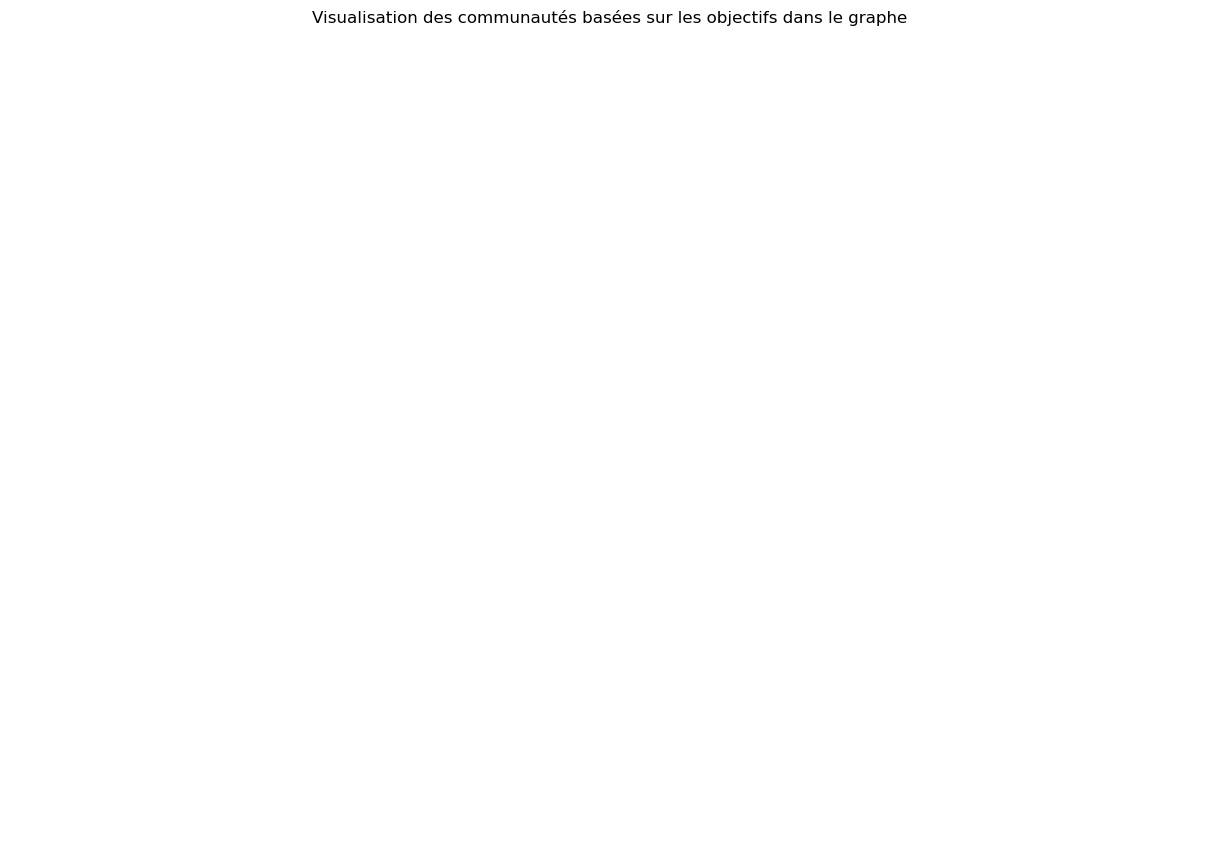

In [57]:
from rdflib import Graph, RDF, URIRef, Namespace
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Chargement des données RDF
graph = Graph()
graph.parse("teaching_akg.ttl", format="ttl")

# Définir l'espace de noms pour les entités (ajuster si nécessaire)
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Remplacez par votre espace de noms réel

# Extraire et imprimer les assertions pertinentes liées aux objectifs
relevant_assertions = []

for subj, pred, obj in graph:
    # Exclure les sujets et prédicats commençant par "has" ou "is"
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        # Filtrer pour se concentrer sur les objectifs
        if str(pred).startswith("http://sonfack.com/2024/01/tao#objective"):  # Ajustez ce prédicat selon vos besoins
            relevant_assertions.append((subj, pred, obj))

# Créer un graphe NetworkX (non dirigé) à partir des assertions pertinentes
G = nx.Graph()  # Changer DiGraph en Graph

for subj, pred, obj in relevant_assertions:
    G.add_edge(str(subj), str(obj), label=str(pred))

# Impression des assertions pertinentes
for subj, pred, obj in relevant_assertions:
    print(f"Subject: {subj.split('#')[-1]}\nPredicate: {pred.split('#')[-1]}\nObject: {obj.split('#')[-1]}\n")

# Détection des communautés à l'aide de Louvain
partition = community_louvain.best_partition(G)

# Préparation des couleurs pour chaque communauté
color_map = []
for node in G:
    color_map.append(partition[node])

# Visualisation
plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, font_weight='bold', node_size=500)
plt.title('Visualisation des communautés basées sur les objectifs dans le graphe')
plt.show()


In [65]:
from rdflib import Graph, RDF, URIRef, Namespace
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
from collections import Counter

# Chargement des données RDF
graph = Graph()
graph.parse("teaching_akg.ttl", format="ttl")

# Définir l'espace de noms pour les entités (ajuster si nécessaire)
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Remplacez par votre espace de noms réel

# Extraire et imprimer les assertions pertinentes
relevant_assertions = []

for subj, pred, obj in graph:
    # Exclure les sujets et prédicats commençant par "has" ou "is"
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        relevant_assertions.append((subj, pred, obj))

# Créer un graphe NetworkX à partir des assertions pertinentes
G = nx.DiGraph()

for subj, pred, obj in relevant_assertions:
    G.add_edge(str(subj), str(obj), label=str(pred))

# Impression des assertions pertinentes
for subj, pred, obj in relevant_assertions:
    print(f"Subject: {subj.split('#')[-1]}\nPredicate: {pred.split('#')[-1]}\nObject: {obj.split('#')[-1]}\n")

# Détection des communautés à l'aide de Louvain
partition = community_louvain.best_partition(G)

# Préparation des couleurs pour chaque communauté
color_map = []
for node in G:
    color_map.append(partition[node])


def read_all_activities(akg: Graph, as_str=True) -> list:
    """This function returns all activities of an activity knowledge graph
    - akg: an activity knowledge graph as parsed by RDFLib
    - as_str: (boolean) tells if the activities are simple str default = True
    """
    activities_list = [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities_list


def read_akg_node(node_uri: str, akg:Graph, as_str=True) -> dict:
    """This function returns all elements directly linked to a akg node
    - activity_uri (string): the given activity uri in graph akg
    - akg (Graph): an activity knowledge graph as parsed by RDFLib
    """
    activity_info = {}
    activity_uri_ref = f"{akg_namespace}{node_uri}"
    print(activity_uri_ref)
    for act_predicate, act_object in akg.predicate_objects(subject=URIRef(activity_uri_ref)):
        pred = act_predicate
        obj = act_object
        if as_str:
            pred = str(act_predicate)
            obj = str(act_object)
        if pred in activity_info:
            existing_objects = activity_info[pred] + [obj]
            activity_info[pred] = existing_objects
        else:
            activity_info[pred] = [obj]
    return activity_info

print(read_all_activities(g, False))

def add_activity_to_nxgraph(G, activity_uri, activity_info):
    #print("ajout de l'activité", activity_uri)
    #print("affichage des informations", activity_info)
    activity_g = nx.DiGraph()

    for pred, obj_list in activity_info.items():
        pred_label = pred.split('/')[-1]
        if '#' in pred_label:
            pred_label = pred_label.split('#')[1]

        for obj in obj_list:
            obj_label = obj.split('/')[-1]
            node_info = read_akg_node(obj_label, g)

            if node_info:
                # Assurez-vous que vous récupérez une chaîne et non une liste
                obj_label = node_info.get('http://sonfack.com/2023/12/tao/hasName', [None])[0]
                if obj_label is None:
                    continue  # Passer à l'itération suivante si obj_label est None


            G.add_node(activity_uri)
            G.add_node(obj_label)
            G.add_edge(activity_uri, obj_label, label=pred_label)
            activity_g.add_node(activity_uri)
            activity_g.add_node(obj_label)
            activity_g.add_edge(activity_uri, obj_label, label=pred_label)

    visualize_activity(activity_g)

def visualize_activity(G):
  # Visualize the graph
  plt.figure(figsize=(12, 12))

  # Generate positions for nodes using a layout algorithm
  pos = nx.spring_layout(G, seed=42)

  # Draw the nodes and edges
  nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

  # Draw edge labels
  edge_labels = nx.get_edge_attributes(G, 'label')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

  # Show plot
  plt.title("Graphe de Connaissances des Activités")
  plt.show()


def visualize_activity(G):
  # Visualize the graph
  plt.figure(figsize=(12, 12))

  # Generate positions for nodes using a layout algorithm
  pos = nx.spring_layout(G, seed=42)

  # Draw the nodes and edges
  nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

  # Draw edge labels
  edge_labels = nx.get_edge_attributes(G, 'label')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

  # Show plot
  plt.title("Graphe de Connaissances des Activités")
  plt.show()


def add_activity_to_nxgraph(G, activity_uri, activity_info):
    #print("ajout de l'activité", activity_uri)
    #print("affichage des informations", activity_info)
    activity_g = nx.DiGraph()

    for pred, obj_list in activity_info.items():
        pred_label = pred.split('/')[-1]
        if '#' in pred_label:
            pred_label = pred_label.split('#')[1]

        for obj in obj_list:
            obj_label = obj.split('/')[-1]
            node_info = read_akg_node(obj_label, g)

            if node_info:
                # Assurez-vous que vous récupérez une chaîne et non une liste
                obj_label = node_info.get('http://sonfack.com/2023/12/tao/hasName', [None])[0]
                if obj_label is None:
                    continue  # Passer à l'itération suivante si obj_label est None


            G.add_node(activity_uri)
            G.add_node(obj_label)
            G.add_edge(activity_uri, obj_label, label=pred_label)
            activity_g.add_node(activity_uri)
            activity_g.add_node(obj_label)
            activity_g.add_edge(activity_uri, obj_label, label=pred_label)

    visualize_activity(activity_g)



# Convertir le graphe en non dirigé
G_undirected = G.to_undirected()

# Appliquer l'algorithme de Louvain
partitions = community_louvain.best_partition(G_undirected)

# Afficher le nombre de communautés détectées
print(f"Nombre de communautés détectées: {len(set(partitions.values()))}")




def visualize_communities_separately(G, partition):
    """Visualiser chaque communauté séparément avec une couleur distincte."""

    # Obtenir les communautés uniques
    communities = set(partition.values())

    for community_id in communities:
        # Créer un sous-graphe pour la communauté actuelle
        subgraph_nodes = [node for node, comm in partition.items() if comm == community_id]
        H = G.subgraph(subgraph_nodes)

        # Positionner les nœuds
        pos = nx.spring_layout(H, seed=42)

        plt.figure(figsize=(10, 8))

        # Dessiner les nœuds avec une couleur spécifique à la communauté
        nx.draw_networkx_nodes(H, pos, node_color=f"C{community_id % 10}", node_size=300, cmap=plt.cm.Set1)

        # Dessiner les arêtes
        nx.draw_networkx_edges(H, pos, edge_color="gray", alpha=0.5)

        # Afficher les labels des nœuds
        node_labels = {node: node for node in H.nodes()}
        nx.draw_networkx_labels(H, pos, labels=node_labels, font_size=8, font_weight="bold", font_color="black")

        # Afficher les labels des arêtes
        edge_labels = nx.get_edge_attributes(H, 'label')
        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_color='red', font_size=10)

        plt.title(f"Communauté {community_id} dans le Graphe de Connaissances")
        plt.show()

# Visualiser chaque communauté séparément
visualize_communities_separately(G, partition)

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Exemple d'utilisation
graph = Graph()  # Assurez-vous de charger ou initialiser le graphe RDF correctement
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Récupérer et afficher les noms des activités
all_activities = get_all_activities(graph)
print("Liste de toutes les activités :")
for activity in all_activities:
    activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
    print(activity_name)




# Récupérer et afficher les noms des activités
all_activities = get_all_activities(graph)
print("Liste de toutes les activités :")
for activity in all_activities:
    activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
    print(f"Nom de l'activité: {activity_name}")

    # Obtenir les détails de l'activité
    activity_details = get_activity_details(graph, activity)

    # Afficher les détails de l'activité
    print("Détails de l'activité :")
    for subj, details in activity_details.items():
        print(f"  Activité: {subj}")
        for pred, obj in details:
            print(f"    {pred}: {obj}")
    print("\n")






# Compter le nombre de nœuds par communauté
community_sizes = Counter(best_partition.values())

# Créer un diagramme en camembert pour visualiser la répartition
labels = community_sizes.keys()
sizes = community_sizes.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Répartition des communautés")
plt.show()




# Visualisation
plt.figure(figsize=(12, 8))
nx.draw(G, node_color=color_map, with_labels=True, font_weight='bold', node_size=500)
plt.title('Visualisation des assertions pertinentes dans le graphe')
plt.show()


Subject: http://sonfack.com/2023/12/tao/digital-8df1b194-5e61-489b-ab31-366843c55775
Predicate: http://sonfack.com/2023/12/cao/hasName
Object: Learn Python - Full Course for Beginners

Subject: http://sonfack.com/2023/12/tao/pycourse-3f993bf5-1c2f-4f58-b85a-7b6b92bcf64b
Predicate: http://sonfack.com/2023/12/cao/hasSubject
Object: http://sonfack.com/2023/12/tao/teacher-45b1d68b-d33c-4eaf-93af-7c44f8ef3fa8

Subject: http://sonfack.com/2023/12/tao/laptop-a206be12-21fb-4fbf-b40b-4459b1cf4348
Predicate: http://sonfack.com/2023/12/tao/isUsedFor
Object: http://sonfack.com/2023/12/tao/secourse-511f491d-ea2b-428f-900e-604ea778dab5

Subject: http://sonfack.com/2023/12/tao/tutorialroom-57179062-99d4-4da0-88b4-e800809fac73
Predicate: http://sonfack.com/2023/12/cao/hasName
Object: TR001

Subject: http://sonfack.com/2023/12/tao/Video
Predicate: subClassOf
Object: http://sonfack.com/2023/12/tao/DigitalResource

Subject: http://sonfack.com/2023/12/tao/teacher-270696cb-b304-42d7-91d9-694e5e8c0a7b
Predi

TypeError: Bad graph type, use only non directed graph

In [4]:
# Importations de bibliothèques
from rdflib import Graph, RDF, URIRef, Namespace
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
from collections import Counter
import re

# Chargement et parsing des données RDF
graph = Graph()
graph.parse("teaching_akg.ttl", format="ttl")

# Définition des namespaces
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Remplacez par votre espace de noms réel

# Création d'un graphe NetworkX à partir des assertions pertinentes
G = nx.DiGraph()

# Appliquer l'algorithme de Louvain sur le graphe non dirigé
G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected)

# Fonction pour lire toutes les activités
def read_all_activities(akg: Graph, as_str=True) -> list:
    """Retourne toutes les activités d'un graphe de connaissances d'activités."""
    activities_list = [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=TAO.Activity)]
    return activities_list

# Fonctions pour ajouter des activités dans un graphe NetworkX et visualiser

def add_activity_to_nxgraph(G, activity_uri, activity_info):
    activity_g = nx.DiGraph()
    for pred, obj_list in activity_info.items():
        pred_label = pred.split('/')[-1]
        for obj in obj_list:
            obj_label = obj.split('/')[-1]
            G.add_node(activity_uri, color="red")
            G.add_node(obj_label, color="blue")
            G.add_edge(activity_uri, obj_label, label=pred_label)
    visualize_activity(activity_g)

def visualize_activity(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 12))
    node_colors = ["red" if G.nodes[node].get("color") == "red" else "blue" for node in G]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, font_weight="bold")
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)
    plt.show()

# Visualisation de toutes les communautés, d'une seule communauté ou de plusieurs activités

def visualize_all_communities(G, partition):
    communities = set(partition.values())
    for community_id in communities:
        subgraph_nodes = [node for node, comm in partition.items() if comm == community_id]
        H = G.subgraph(subgraph_nodes)
        pos = nx.spring_layout(H, seed=42)
        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(H, pos, node_color=f"C{community_id % 10}", node_size=300, cmap=plt.cm.Set1)
        nx.draw_networkx_edges(H, pos, edge_color="gray", alpha=0.5)
        nx.draw_networkx_labels(H, pos, font_size=8, font_weight="bold")
        edge_labels = nx.get_edge_attributes(H, 'label')
        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_color='red', font_size=10)
        plt.title(f"Communauté {community_id}")
        plt.show()

def visualize_single_community(activity_name, partition):
    """Visualise la communauté contenant l'activité spécifiée."""
    community_id = None
    for node in partition:
        if activity_name in node:
            community_id = partition[node]
            break
    
    if community_id is not None:
        subgraph_nodes = [node for node, comm in partition.items() if comm == community_id]
        H = G.subgraph(subgraph_nodes)
        visualize_activity(H)
    else:
        print(f"L'activité '{activity_name}' n'appartient à aucune communauté trouvée.")

def visualize_multiple_activities(activities, partition):
    """Visualise un sous-graphe pour les activités sélectionnées."""
    selected_nodes = [node for node in partition if any(activity in node for activity in activities)]
    if selected_nodes:
        H = G.subgraph(selected_nodes)
        visualize_activity(H)
    else:
        print("Aucune activité correspondante trouvée.")

def visualize_based_on_resources(resources, partition):
    """Visualise autour des ressources spécifiques."""
    selected_nodes = [node for node, data in G.nodes(data=True) if any(res in node for res in resources)]
    if selected_nodes:
        H = G.subgraph(selected_nodes)
        visualize_activity(H)
    else:
        print("Aucune ressource correspondante trouvée.")

# Générer et visualiser le dendrogramme
def visualize_dendrogram(G):
    dendrogram = community_louvain.generate_dendrogram(G)
    for level in range(len(dendrogram)):
        partition = community_louvain.partition_at_level(dendrogram, level)
        community_colors = [partition[node] for node in G.nodes()]
        pos = nx.spring_layout(G, seed=42)
        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(G, pos, node_color=community_colors, cmap=plt.cm.jet, node_size=300)
        nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")
        plt.title(f"Visualisation des communautés à partir du niveau {level} du dendrogramme")
        plt.show()

# Fonction principale pour l'interaction utilisateur

def main():
    print("Choisissez une option de visualisation des communautés :")
    print("1 - Visualiser toutes les communautés séparées")
    print("2 - Visualiser une seule communauté (par nom d'activité)")
    print("3 - Visualiser un sous-graphe avec plusieurs activités")
    print("4 - Visualiser autour des ressources spécifiques")
    print("5 - Visualiser le dendrogramme")

    choice = int(input("Entrez le numéro de votre choix : "))

    if choice == 1:
        visualize_all_communities(G_undirected, partition)
    elif choice == 2:
        activity_name = input("Entrez le nom de l'activité : ")
        visualize_single_community(activity_name, partition)
    elif choice == 3:
        activities = input("Entrez les noms des activités, séparés par des virgules : ").split(',')
        visualize_multiple_activities([activity.strip() for activity in activities], partition)
    elif choice == 4:
        resources = [
            "hasObjective", "activityDescription", "hasSubject", "hasName", "hasDuration", 
            "hasBeginTime", "isComposedOf", "hasLocation", "schema#", "hasBeneficialTo", 
            "isCarriedOutWith"
        ]
        visualize_based_on_resources(resources, partition)
    elif choice == 5:
        visualize_dendrogram(G)
    else:
        print("Choix non valide.")

# Exécution du programme principal
if __name__ == "__main__":
    main()


Choisissez une option de visualisation des communautés :
1 - Visualiser toutes les communautés séparées
2 - Visualiser une seule communauté (par nom d'activité)
3 - Visualiser un sous-graphe avec plusieurs activités
4 - Visualiser autour des ressources spécifiques
5 - Visualiser le dendrogramme


Entrez le numéro de votre choix :  1


In [4]:
import matplotlib.pyplot as plt
import community as community_louvain
import networkx as nx

# Assuming G_undirected is the undirected graph for the Louvain dendrogram
def visualize_dendrogram_circular_chart(G_undirected):
    # Generate the partition for the highest level of the dendrogram
    partition = community_louvain.best_partition(G_undirected)
    
    # Count the number of nodes in each community
    community_counts = {}
    for node, community_id in partition.items():
        community_counts[community_id] = community_counts.get(community_id, 0) + 1

    # Calculate the proportion of each community
    total_nodes = sum(community_counts.values())
    sizes = [(count / total_nodes) * 100 for count in community_counts.values()]
    
    # Plotting the circular pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    plt.title("Distribution des communautés (Dendrogramme circulaire)")
    plt.show()

# Modify the main function to call this function in choice 5
def main():
    print("Choisissez une option de visualisation des communautés :")
    print("1 - Visualiser toutes les communautés séparées")
    print("2 - Visualiser une seule communauté (par nom d'activité)")
    print("3 - Visualiser un sous-graphe avec plusieurs activités")
    print("4 - Visualiser autour des ressources spécifiques")
    print("5 - Visualiser le dendrogramme circulaire")
    print("6 - Quitter")

    choice = int(input("Entrez le numéro de votre choix : "))

    if choice == 1:
        visualize_all_communities(G_undirected, partition)
    elif choice == 2:
        activity_name = input("Entrez le nom de l'activité : ")
        visualize_single_community(activity_name, partition)
    elif choice == 3:
        activities = input("Entrez les noms des activités, séparés par des virgules : ").split(',')
        visualize_multiple_activities([activity.strip() for activity in activities], partition)
    elif choice == 4:
        resources = [
            "hasObjective", "activityDescription", "hasSubject", "hasName", "hasDuration", 
            "hasBeginTime", "isComposedOf", "hasLocation", "hasBeneficialTo", 
            "isCarriedOutWith"
        ]
        visualize_based_on_resources(resources, partition)
    elif choice == 5:
        visualize_dendrogram_circular_chart(G_undirected)
    elif choice == 6:
        print("Fin du programme.")
    else:
        print("Choix non valide.")

# Execute the main program
main()


Choisissez une option de visualisation des communautés :
1 - Visualiser toutes les communautés séparées
2 - Visualiser une seule communauté (par nom d'activité)
3 - Visualiser un sous-graphe avec plusieurs activités
4 - Visualiser autour des ressources spécifiques
5 - Visualiser le dendrogramme circulaire
6 - Quitter


Entrez le numéro de votre choix :  2
Entrez le nom de l'activité :  pycourse, dbcourse


NameError: name 'visualize_single_community' is not defined

Activités disponibles :
1. dbcourse-b63a9944-19f6-4f41-bcbd
2. dbtutorial-78aca3f8-53fd-4f47-9406
3. pycourse-3f993bf5-1c2f-4f58-b85a
4. pypractical-f18f0361-3f12-4b3d-9459
5. uicourse-eaf2d283-4eb8-4024-a2c5
6. pmcourse-adee0f07-9e90-412b-95d4
7. secourse-511f491d-ea2b-428f-900e
8. setutorial-adbef907-11e0-40c1-8dd2
9. sepractical-88ca540f-fd64-4a3c-92fd
10. seproject-d3e90a3c-f550-45eb-b00e


Choisissez la première activité par numéro :  1
Choisissez la deuxième activité par numéro :  2


Modularité du graphe d'activités : 0.41919999999999996


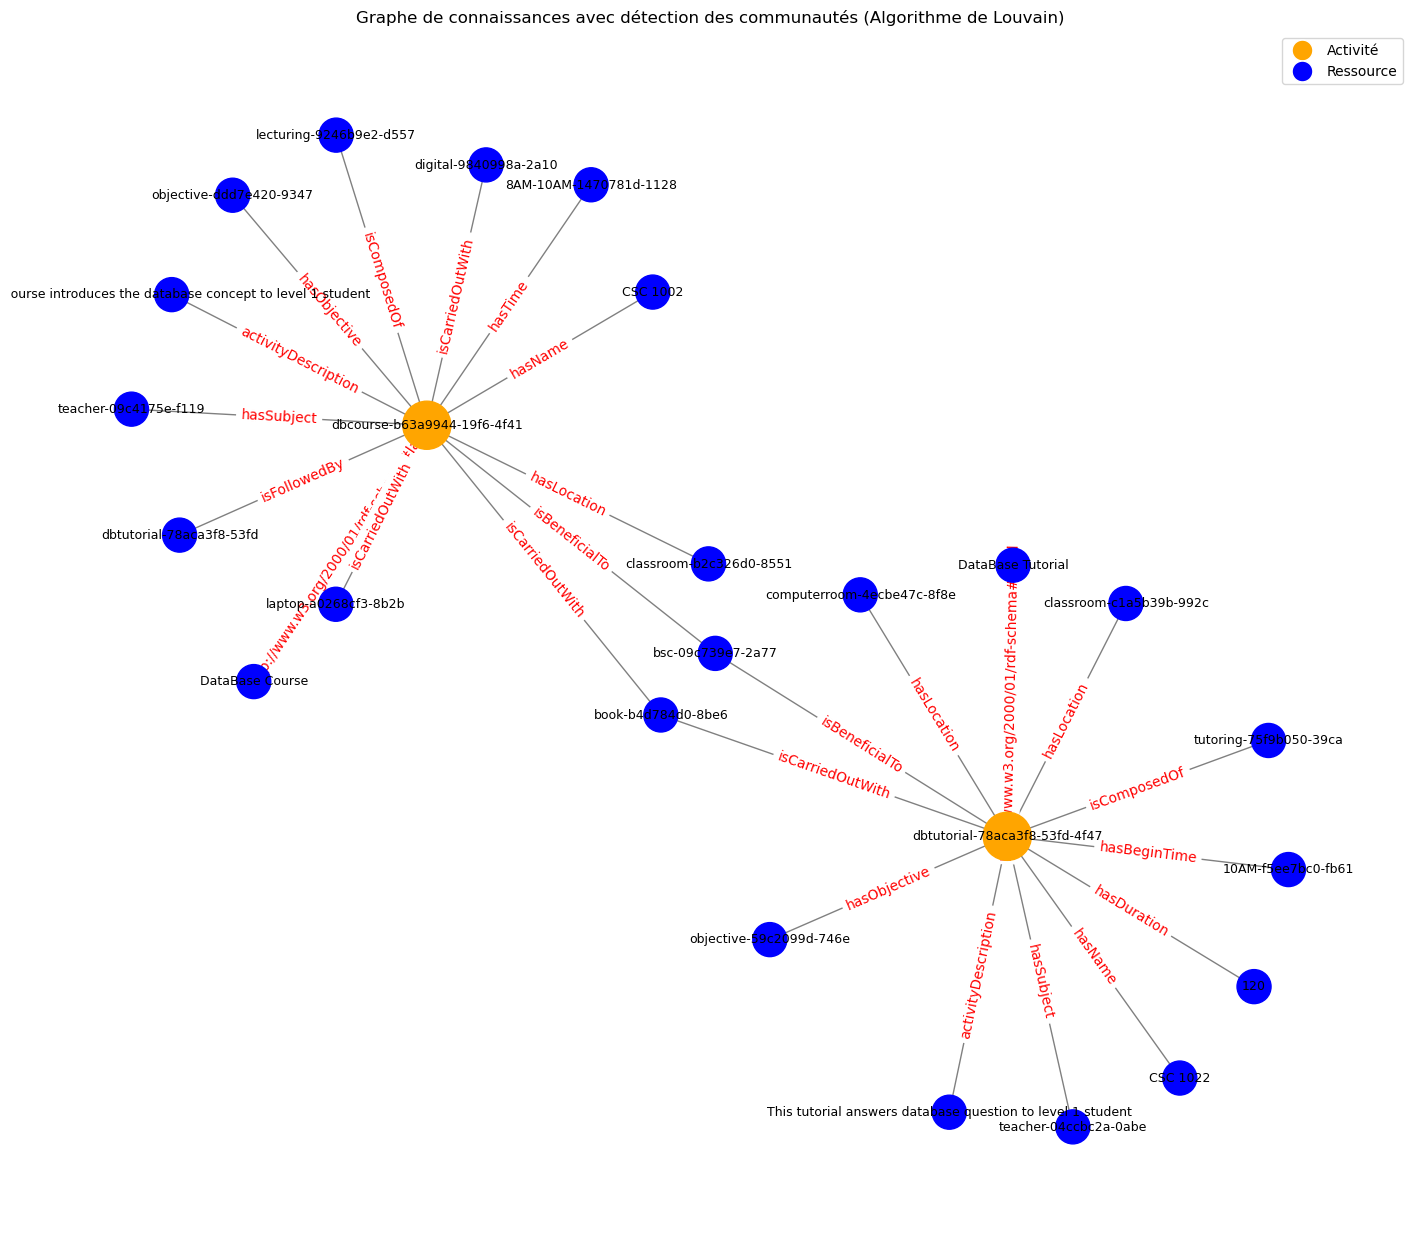

In [2]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  # Algorithme de Louvain pour la détection de communautés
import re

# Charger le fichier RDF
akg_file = "teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.Graph()

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire et nettoyer les noms des URI
def extract_name(uri):
    """Extrait le nom propre d'un URI en supprimant les namespaces et les identifiants."""
    name = re.sub(r'http://sonfack\.com/2023/12/(tao|cao)/', '', uri)  # Supprimer les namespaces
    name = re.sub(r'-\w+$', '', name)  # Supprimer les identifiants après un tiret
    return name

# Fonction pour lire toutes les activités
def read_all_activities(akg: Graph) -> list:
    """Retourne toutes les activités dans un graphe de connaissances."""
    return [activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity)]

# Fonction pour obtenir les détails d'une activité spécifique
def get_activity_details(activity_uri: URIRef, akg: Graph) -> dict:
    """Retourne les détails d'une activité sous forme de dictionnaire."""
    details = {}
    for pred, obj in akg.predicate_objects(subject=activity_uri):
        # Ignorer le type 'Activity' dans l'affichage
        if str(obj) == str(cao_namespace.Activity):
            continue
        pred_label = extract_name(str(pred))
        obj_label = extract_name(str(obj))
        details.setdefault(pred_label, []).append(obj_label)
    return details

# Fonction pour ajouter les activités et leurs relations au graphe NetworkX sans liaison entre les deux activités centrales
def add_activity_to_graph(G, activity_uri, akg, excluded_activity):
    """Ajoute une activité et ses relations au graphe NetworkX sans liaison avec une activité exclue."""
    details = get_activity_details(activity_uri, akg)
    activity_name = extract_name(str(activity_uri))
    
    for pred, objs in details.items():
        for obj in objs:
            obj_name = extract_name(str(obj))
            # Ne pas ajouter de lien direct entre les deux activités centrales
            if obj_name != excluded_activity:
                G.add_node(activity_name, type="activité", color="orange")  # Couleur orange pour les activités
                G.add_node(obj_name, type="ressource", color="blue")        # Couleur bleue pour les ressources
                G.add_edge(activity_name, obj_name, label=pred)

# Fonction pour appliquer l'algorithme de Louvain et obtenir des partitions
def apply_louvain_clustering(G):
    """Applique l'algorithme de Louvain pour détecter les communautés dans le graphe."""
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)  # Calculer la modularité
    return partition, modularity

# Visualisation améliorée du graphe de connaissances avec les communautés détectées
def visualize_louvain_graph(G, partition):
    """Visualise le graphe avec les communautés détectées par l'algorithme de Louvain."""
    pos = nx.spring_layout(G, seed=42, k=0.5, scale=2)
    plt.figure(figsize=(14, 12))

    # Couleur et taille des nœuds pour les activités et les ressources
    node_colors = ["orange" if G.nodes[node].get("type") == "activité" else "blue" for node in G]
    node_sizes = [1200 if G.nodes[node].get("type") == "activité" else 600 for node in G]

    # Couleur des arêtes
    edge_colors = [G.edges[edge].get("color", "gray") for edge in G.edges]

    # Dessiner les nœuds et les arêtes
    nx.draw(G, pos, with_labels=True, labels={node: extract_name(node) for node in G.nodes()},
            node_size=node_sizes, node_color=node_colors, edge_color=edge_colors, font_size=9)
    
    # Afficher les étiquettes des arêtes sans URI complet
    edge_labels = nx.get_edge_attributes(G, 'label')
    simplified_edge_labels = {key: extract_name(label) for key, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=simplified_edge_labels, font_color="red")

    # Légende pour les couleurs des nœuds
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Activité', markersize=15, markerfacecolor='orange'),
        plt.Line2D([0], [0], marker='o', color='w', label='Ressource', markersize=15, markerfacecolor='blue')
    ], loc='upper right')

    plt.title("Graphe de connaissances avec détection des communautés (Algorithme de Louvain)")
    plt.show()

# Fonction principale
def main():
    # Liste des activités disponibles
    all_activities = read_all_activities(g)
    print("Activités disponibles :")
    for i, activity in enumerate(all_activities, start=1):
        print(f"{i}. {extract_name(str(activity))}")

    # Sélection des activités
    while True:
        try:
            choice1 = int(input("Choisissez la première activité par numéro : ")) - 1
            choice2 = int(input("Choisissez la deuxième activité par numéro : ")) - 1
            if 0 <= choice1 < len(all_activities) and 0 <= choice2 < len(all_activities) and choice1 != choice2:
                break
            else:
                print("Choix non valides. Veuillez réessayer.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer des nombres.")

    # Obtenir les noms des activités pour l'exclusion
    activity1_name = extract_name(str(all_activities[choice1]))
    activity2_name = extract_name(str(all_activities[choice2]))

    # Ajouter les activités sélectionnées au graphe NetworkX sans liaison directe
    add_activity_to_graph(G, all_activities[choice1], g, excluded_activity=activity2_name)
    add_activity_to_graph(G, all_activities[choice2], g, excluded_activity=activity1_name)

    # Appliquer l'algorithme de Louvain pour détecter les communautés et obtenir la modularité
    partition, modularity = apply_louvain_clustering(G)

    # Afficher la modularité
    print(f"Modularité du graphe d'activités : {modularity}")

    # Visualiser le graphe avec les communautés détectées
    visualize_louvain_graph(G, partition)

if __name__ == "__main__":
    main()
